In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [3]:
# What the next training intensity needs to be, related to the yearly average and to the last training.

In [29]:
df.columns

Index(['Session', 'Day', 'Turnover', 'Player Last Name',
       'Player Primary Position', 'Drill Title', 'Drill Start Time',
       'Drill End Time', 'Session Start Time', 'Session End Time',
       'Total Time', 'Total Distance', 'Distance Zone 4 (Absolute)',
       'Distance Zone 5 (Absolute)', 'Distance Zone 6 (Absolute)',
       'HSR Per Minute (Absolute)', 'Sprint Distance', 'Accelerations Per Min',
       'Decelerations Per Min', 'Max Speed', 'Distance Per Min',
       'Accelerations', 'Decelerations', 'HMLD Per Minute', 'HML Distance',
       'Drill Title2', 'Drill Title_unique'],
      dtype='object')

In [10]:
df = pd.read_csv('Football Analysis/Master_Training 2023_24.csv')

# # Initialize the 'Number' column with zeros
# df['Training Number'] = 0

# # Assign a unique number to each group of consecutive values in the 'Day' column
# current_day = None
# current_number = 0

# for index, row in df.iterrows():
#     if row['Day'] != current_day:
#         current_day = row['Day']
#         current_number += 1
#     df.at[index, 'Training Number'] = current_number

In [3]:
np.array(df['Drill Title'])

array(['Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 1',
       'Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 2',
       'Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 3', ...,
       'Possession Game Tactical 10vs9 + 6 Mini Goals (40*60m) Set 4',
       'Tactical Offense 11vs11 (All The Field, 68*105m) Set 2',
       'Tactical Offense 11vs11 (All The Field, 68*105m) Set 4'],
      dtype=object)

In [7]:
len(df['Drill Title'].unique())

77

In [11]:
# Extract the common part of the drill titles by removing the set information
df['Drill Title2'] = df['Drill Title'].str.replace(r', Set \d$', '', regex=True)

In [12]:
# Extract the common part of the drill titles by removing the set information
df['Drill Title_unique'] = df['Drill Title2'].str.replace(r' Set \d$', '', regex=True)

In [ ]:
len(np.array(df['Drill Title3']))

In [14]:
len(df['Drill Title_unique'].unique())

21

In [17]:
df['Drill Title_unique'].unique()

array(['Passing Drill, Tactical, 3 Structures, 3 Mini Goals',
       'Possession Game 10vs10+2J (40*60m), 15 Passes Goal',
       'Tactical 11vs11 (68*78m)',
       'Possession Game 9vs6, 2GK + 4 Mini Goals (24*36m)',
       'Tactical 11vs11, Build-up (68*78m)', 'Warm-up, Passing Drill',
       'Split - Defense, Technical-Tactical Line of 4',
       'Tactical Possession Game, 10vs9 + 1GK (68*65m, 35m)',
       'Split - Offense, Finishing 4 Combination',
       'Possession Game, 8vs4 (14*20m) 3 Groups of 4',
       'Passing Drill, 10vs10 Mannequin +1GK (68*52m)',
       'Tactical Defense 11vs11 (All The Field, 68*105)',
       'Tactical Offense 11vs11 (All The Field, 68*105)',
       'Possession Game 4vs4+3J (12*18m)', '1st half', '2nd half',
       'Passing Drill, Tactical, 3 Structure 3GK,(23*53m)',
       'Tactical Defense (All The Field, 68*105m)',
       'Possession Game 4vs4+3J + 4 Mini Goals (12*18m)',
       'Possession Game Tactical 10vs9 + 6 Mini Goals (40*60m)',
       'Tacti

In [18]:
len(df['Drill Title_unique'].unique())

21

In [130]:
df.head().columns

Index(['Session', 'Day', 'Turnover', 'Player Last Name',
       'Player Primary Position', 'Drill Title', 'Drill Start Time',
       'Drill End Time', 'Session Start Time', 'Session End Time',
       'Total Time', 'Total Distance', 'Distance Zone 4 (Absolute)',
       'Distance Zone 5 (Absolute)', 'Distance Zone 6 (Absolute)',
       'HSR Per Minute (Absolute)', 'Sprint Distance', 'Accelerations Per Min',
       'Decelerations Per Min', 'Max Speed', 'Distance Per Min',
       'Accelerations', 'Decelerations', 'HMLD Per Minute', 'HML Distance',
       'Drill Title2', 'Drill Title3', 'Drill Title_unique'],
      dtype='object')

In [19]:
# Get the unique training titles
unique_training_titles = df['Drill Title_unique'].unique()

# Create an empty dictionary to store the segmented data
training_data_segments = {}

# Iterate over the unique training titles and filter the data
for training_title in unique_training_titles:
    training_data_segments[training_title] = df[df['Drill Title_unique'] == training_title]

In [20]:
unique_training_titles

array(['Passing Drill, Tactical, 3 Structures, 3 Mini Goals',
       'Possession Game 10vs10+2J (40*60m), 15 Passes Goal',
       'Tactical 11vs11 (68*78m)',
       'Possession Game 9vs6, 2GK + 4 Mini Goals (24*36m)',
       'Tactical 11vs11, Build-up (68*78m)', 'Warm-up, Passing Drill',
       'Split - Defense, Technical-Tactical Line of 4',
       'Tactical Possession Game, 10vs9 + 1GK (68*65m, 35m)',
       'Split - Offense, Finishing 4 Combination',
       'Possession Game, 8vs4 (14*20m) 3 Groups of 4',
       'Passing Drill, 10vs10 Mannequin +1GK (68*52m)',
       'Tactical Defense 11vs11 (All The Field, 68*105)',
       'Tactical Offense 11vs11 (All The Field, 68*105)',
       'Possession Game 4vs4+3J (12*18m)', '1st half', '2nd half',
       'Passing Drill, Tactical, 3 Structure 3GK,(23*53m)',
       'Tactical Defense (All The Field, 68*105m)',
       'Possession Game 4vs4+3J + 4 Mini Goals (12*18m)',
       'Possession Game Tactical 10vs9 + 6 Mini Goals (40*60m)',
       'Tacti

In [21]:
physical_parameters = ['Total Distance', 'HMLD Per Minute', 'Accelerations Per Min']

In [138]:
trainings = []

In [22]:
trainings = []
for training_title, training_data in training_data_segments.items():
    print(training_title)
    trainings.append((training_data[physical_parameters].describe(),training_title))
    print(training_data[physical_parameters].describe())
    print('\n')

Passing Drill, Tactical, 3 Structures, 3 Mini Goals
       Total Distance  HMLD Per Minute  Accelerations Per Min
count       42.000000        42.000000              42.000000
mean       477.261905        17.459524               1.548333
std         51.954041         4.320716               0.515988
min        331.000000         6.360000               0.220000
25%        443.500000        14.950000               1.330000
50%        483.000000        17.170000               1.550000
75%        514.250000        20.680000               1.970000
max        587.000000        27.170000               2.330000


Possession Game 10vs10+2J (40*60m), 15 Passes Goal
       Total Distance  HMLD Per Minute  Accelerations Per Min
count       48.000000        48.000000              48.000000
mean       392.270833        27.372500               1.562500
std         37.078835         7.190414               0.688123
min        318.000000        15.710000               0.000000
25%        366.500000      

       Total Distance  HMLD Per Minute  Accelerations Per Min
count       57.000000        57.000000              57.000000
mean       499.368421        15.720526               1.130702
std         45.917096         4.644527               0.547102
min        421.000000         8.870000               0.000000
25%        468.000000        12.230000               0.790000
50%        494.000000        15.090000               1.190000
75%        542.000000        17.720000               1.400000
max        621.000000        32.230000               2.380000


Tactical Defense (All The Field, 68*105m)
       Total Distance  HMLD Per Minute  Accelerations Per Min
count      102.000000       102.000000             102.000000
mean       364.382353        24.721275               1.390882
std         52.286727         8.681501               0.640595
min        200.000000         1.450000               0.000000
25%        327.250000        19.380000               0.945000
50%        359.500000     

In [27]:
type(trainings[0][0])

pandas.core.frame.DataFrame

In [151]:
tables = [data[0] for data in trainings]
titles = [data[1] for data in trainings]
# Calculate the means for each table
table_means = [table.mean() for table in tables]

In [153]:
table_means[0]

Total Distance           366.245743
HMLD Per Minute           18.763780
Accelerations Per Min      6.433040
dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

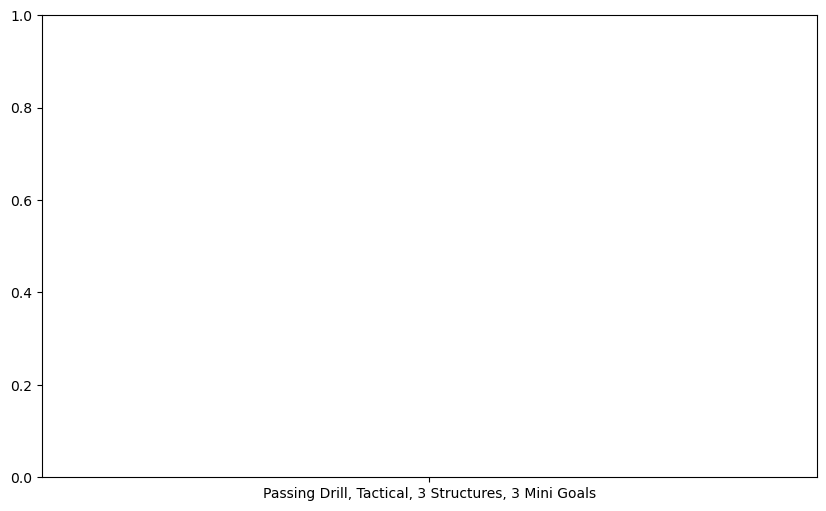

In [150]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(titles, table_means)
plt.xlabel('Training')
plt.ylabel('Mean')
plt.title('Mean of Each Table')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

[       Total Distance  HMLD Per Minute  Accelerations Per Min
 count       42.000000        42.000000              42.000000
 mean       477.261905        17.459524               1.548333
 std         51.954041         4.320716               0.515988
 min        331.000000         6.360000               0.220000
 25%        443.500000        14.950000               1.330000
 50%        483.000000        17.170000               1.550000
 75%        514.250000        20.680000               1.970000
 max        587.000000        27.170000               2.330000,
        Total Distance  HMLD Per Minute  Accelerations Per Min
 count       48.000000        48.000000              48.000000
 mean       392.270833        27.372500               1.562500
 std         37.078835         7.190414               0.688123
 min        318.000000        15.710000               0.000000
 25%        366.500000        22.225000               1.247500
 50%        391.500000        27.015000               

In [5]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.co.uk/transfers/transferrekorde/statistik/top/plus/0/galerie/0?saison_id=2000"

# Uses the requests library to grab the code of the page and assign it to ‘pageTree’
pageTree = requests.get(page, headers=headers)
# BeautifulSoup module parses the website code into html
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

In [49]:
pageSoup

<!DOCTYPE html>

<html lang="en">
<head>
<script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.addEventListener("message", (function (e) { 

In [50]:
Players = pageSoup.find_all("table", class_='inline-table')

In [55]:
Players[3]

<table class="inline-table">
<tr>
<td rowspan="2">
<a href="/lazio-rom/startseite/verein/398/saison_id/2000" title="SS Lazio"><img alt="SS Lazio" class="" src="https://tmssl.akamaized.net/images/wappen/tiny/398_1601537796.png?lm=1601537796" title=" "/></a> </td>
<td class="hauptlink">
<a href="/lazio-rom/startseite/verein/398/saison_id/2000" title="SS Lazio">Lazio</a> </td>
</tr>
<tr>
<td>
<img alt="Italy" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/75.png?lm=1520611569" title="Italy"/> <a href="/serie-a/transfers/wettbewerb/IT1/saison_id/2000" title="Serie A">Serie A</a> </td>
</tr>
</table>

In [66]:
Players = pageSoup.find_all("td", class_='hauptlink')

In [67]:
Players_list = []
Teams_list = []
Price_list = []

'Luís Figo'

In [80]:
for i in range(len(Players)/3):
    print(Players[3*i].a.text)

TypeError: 'float' object cannot be interpreted as an integer

In [57]:
Players

[<td class="hauptlink">
 <a href="/luis-figo/profil/spieler/3446" title="Luís Figo">Luís Figo</a> </td>,
 <td class="hauptlink">
 <a href="/real-madrid/startseite/verein/418/saison_id/2000" title="Real Madrid">Real Madrid</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/3446/transfer_id/5480">€60.00m</a></td>,
 <td class="hauptlink">
 <a href="/hernan-crespo/profil/spieler/3410" title="Hernán Crespo">Hernán Crespo</a> </td>,
 <td class="hauptlink">
 <a href="/lazio-rom/startseite/verein/398/saison_id/2000" title="SS Lazio">Lazio</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/3410/transfer_id/8309">€56.81m</a></td>,
 <td class="hauptlink">
 <a href="/gabriel-batistuta/profil/spieler/5959" title="Gabriel Batistuta">Gabriel Batistuta</a> </td>,
 <td class="hauptlink">
 <a href="/as-rom/startseite/verein/12/saison_id/2000" title="AS Roma">AS Roma</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/5959/tr

In [44]:
Players = pageSoup.find_all("tbody")

In [47]:
len(Players)

7

In [42]:
Players[0]

<table class="inline-table">
<tr>
<td rowspan="2">
<img alt="Luís Figo" class="bilderrahmen-fixed lazy lazy" data-src="https://img.a.transfermarkt.technology/portrait/medium/3446-1570440028.jpg?lm=1" src="data:image/gif;base64,R0lGODlhAQABAIAAAMLCwgAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" title="Luís Figo"> </img></td>
<td class="hauptlink">
<a href="/luis-figo/profil/spieler/3446" title="Luís Figo">Luís Figo</a> </td>
</tr>
<tr>
<td>Right Winger</td>
</tr>
</table>

In [7]:
Players = pageSoup.find_all("td", {"class": "hauptlink"})

In [8]:
Players[0]

<td class="hauptlink">
<a href="/luis-figo/profil/spieler/3446" title="Luís Figo">Luís Figo</a> </td>

In [12]:
Players[0].a.title

In [88]:
Players = pageSoup.find_all("td", {"class": "hauptlink"})
Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})

In [103]:
Players

[<td class="hauptlink">
 <a href="/luis-figo/profil/spieler/3446" title="Luís Figo">Luís Figo</a> </td>,
 <td class="hauptlink">
 <a href="/real-madrid/startseite/verein/418/saison_id/2000" title="Real Madrid">Real Madrid</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/3446/transfer_id/5480">€60.00m</a></td>,
 <td class="hauptlink">
 <a href="/hernan-crespo/profil/spieler/3410" title="Hernán Crespo">Hernán Crespo</a> </td>,
 <td class="hauptlink">
 <a href="/lazio-rom/startseite/verein/398/saison_id/2000" title="SS Lazio">Lazio</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/3410/transfer_id/8309">€56.81m</a></td>,
 <td class="hauptlink">
 <a href="/gabriel-batistuta/profil/spieler/5959" title="Gabriel Batistuta">Gabriel Batistuta</a> </td>,
 <td class="hauptlink">
 <a href="/as-rom/startseite/verein/12/saison_id/2000" title="AS Roma">AS Roma</a> </td>,
 <td class="rechts hauptlink"><a href="/jumplist/transfers/spieler/5959/tr

In [104]:
players = pageSoup.find_all("td", {"class": "hauptlink"})

for player in players:
    player_name = player.a.text
    print(player_name)

Luís Figo
Real Madrid
€60.00m
Hernán Crespo
Lazio
€56.81m
Gabriel Batistuta
AS Roma
€36.15m
Nicolas Anelka
Paris SG
€34.50m
Marc Overmars
Barcelona
€29.30m
Rio Ferdinand
Leeds
€26.00m
Flávio Conceição
Real Madrid
€25.00m
Savo Milosevic
AC Parma
€25.00m
David Trézéguet
Juventus
€23.24m
Matías Almeyda
AC Parma
€23.00m
Claudio López
Lazio
€23.00m
Jimmy Floyd Hasselbaink
Chelsea
€22.50m
Gerard López
Barcelona
€21.60m
Lucas
Rennes
€21.30m
Pablo Aimar
Valencia
€21.25m
Walter Samuel
AS Roma
€20.80m
Shabani Nonda
Monaco
€20.00m
Robbie Keane
Inter
€19.50m
Jonathan Zebina
AS Roma
€18.40m
Émerson
AS Roma
€18.00m
Tore André Flo
Rangers
€18.00m
Sergiy Rebrov
Tottenham
€18.00m
Angelo Peruzzi
Lazio
€17.90m
Diego Tristán
Dep. La Coruña
€17.75m
Sylvain Wiltord
Arsenal
€17.50m


In [101]:
Players[1].text

'\nReal Madrid '

In [78]:
Values[0].text

'€60.00m'

In [79]:
PlayersList = []
ValuesList = []

for i in range(0,25):
    PlayersList.append(Players[i].text)
    ValuesList.append(Values[i].text)

In [80]:
df = pd.DataFrame({"Players":PlayersList,"Values":ValuesList})

In [81]:
df

Players   Values
0           \nLuís Figo   €60.00m
1         \nReal Madrid   €56.81m
2                €60.00m  €36.15m
3       \nHernán Crespo   €34.50m
4               \nLazio   €29.30m
5                €56.81m  €26.00m
6   \nGabriel Batistuta   €25.00m
7             \nAS Roma   €25.00m
8                €36.15m  €23.24m
9      \nNicolas Anelka   €23.00m
10           \nParis SG   €23.00m
11               €34.50m  €22.50m
12      \nMarc Overmars   €21.60m
13          \nBarcelona   €21.30m
14               €29.30m  €21.25m
15      \nRio Ferdinand   €20.80m
16              \nLeeds   €20.00m
17               €26.00m  €19.50m
18   \nFlávio Conceição   €18.40m
19        \nReal Madrid   €18.00m
20               €25.00m  €18.00m
21     \nSavo Milosevic   €18.00m
22           \nAC Parma   €17.90m
23               €25.00m  €17.75m
24    \nDavid Trézéguet   €17.50m

In [71]:
from bs4 import BeautifulSoup
import pandas as pd , numpy as np

headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.co.uk/transfers/transferrekorde/statistik?saison_id=alle&land_id=0&ausrichtung=&spielerposition_id=&altersklasse=&leihe=&w_s=&plus=1"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

Players = pageSoup.find_all("a", {"class": "spielprofil_tooltip"})
Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
Age = pageSoup.find_all("td", {"class": "zentriert"})

In [73]:
PlayersList = []
ValuesList = []
value_pre = []
rank = []
age = []
season = []
team = []
missing = []

for i in range(0,25):
    PlayersList.append(Players[i].text)
    ValuesList.append(Values[i].text)
    value_pre.append(Values_pre[2*i].text)
    rank.append(Age[(5*i)].text)
    age.append(Age[1 + (5*i)].text)
    season.append(Age[2 + (5*i)].text)
    missing.append(Age[3 + (5*i)].text)
    team.append(Age[4 + (5*i)].text)
    
df = pd.DataFrame({"Players":PlayersList,"Value_post":ValuesList , "value_pre":value_pre , "rank": rank ,  "age":age , "season":season ,  "missing": missing ,    "team":team })

df.head()

IndexError: list index out of range

In [10]:
df.head(2)

Session   Day  Turnover Player Last Name  Player Primary Position  \
0        1  MD-4         6           Glazer                      NaN   
1        1  MD-4         6           Glazer                      NaN   

                                         Drill Title Drill Start Time  \
0  Passing Drill, Tactical, 3 Structures, 3 Mini ...         16:31:31   
1  Passing Drill, Tactical, 3 Structures, 3 Mini ...         16:39:16   

  Drill End Time Session Start Time Session End Time  ...  \
0       16:36:01           16:31:31         17:31:28  ...   
1       16:43:59           16:31:31         17:31:28  ...   

  HSR Per Minute (Absolute)  Sprint Distance  Accelerations Per Min  \
0                      2.87               18                   1.33   
1                      5.89               39                   2.12   

   Decelerations Per Min  Max Speed  Distance Per Min  Accelerations  \
0                   0.67      22.15            114.91              6   
1                   0.85      23.87            124.58             10   

   Decelerations  HMLD Per Minute  HML Distance  
0              3            19.38            87  
1              4            23.09           109  

[2 rows x 25 columns]

In [6]:
df_physical_parameters = df.drop(['Session', 'Day', 'Turnover', 'Player Last Name',
       'Player Primary Position', 'Drill Title', 'Drill Start Time', 'Drill End Time', 'Session Start Time', 'Session End Time',
       'Total Time'], axis=1)

In [7]:
df_physical_parameters.head()

Total Distance  Distance Zone 4 (Absolute)  Distance Zone 5 (Absolute)  \
0             517                         120                          13   
1             587                         177                          28   
2             541                         160                          41   
3             417                         102                          10   
4             426                          92                          18   

   Distance Zone 6 (Absolute)  HSR Per Minute (Absolute)  Sprint Distance  \
0                           0                       2.87               18   
1                           0                       5.89               39   
2                           0                       9.01               52   
3                           0                       3.49                9   
4                           0                       5.87               26   

   Accelerations Per Min  Decelerations Per Min  Max Speed  Distance Per Min  \
0                   1.33                   0.67      22.15            114.91   
1                   2.12                   0.85      23.87            124.58   
2                   2.21                   0.89      24.31            119.80   
3                   1.33                   1.00      22.49            138.88   
4                   0.33                   1.00      23.63            141.83   

   Accelerations  Decelerations  HMLD Per Minute  HML Distance  
0              6              3            19.38            87  
1             10              4            23.09           109  
2             10              4            27.17           123  
3              4              3            40.02           120  
4              1              3            38.65           116

In [11]:
correlation_matrix = df_physical_parameters.corr()

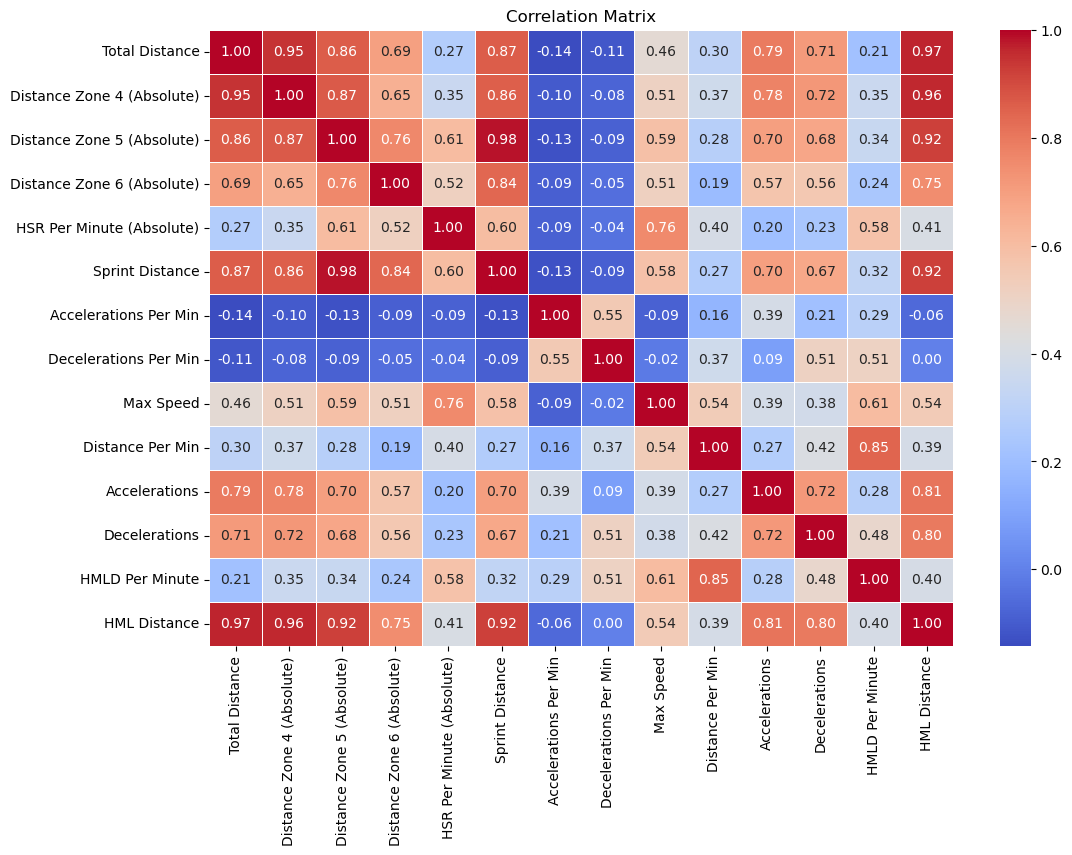

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
missing_values_count = df.isna().sum()
print(missing_values_count)

Session                          0
Day                              0
Turnover                         0
Player Last Name                 0
Player Primary Position       1183
Drill Title                      0
Drill Start Time                 0
Drill End Time                   0
Session Start Time               0
Session End Time                 0
Total Time                       0
Total Distance                   0
Distance Zone 4 (Absolute)       0
Distance Zone 5 (Absolute)       0
Distance Zone 6 (Absolute)       0
HSR Per Minute (Absolute)        0
Sprint Distance                  0
Accelerations Per Min            0
Decelerations Per Min            0
Max Speed                        0
Distance Per Min                 0
Accelerations                    0
Decelerations                    0
HMLD Per Minute                  0
HML Distance                     0
dtype: int64


In [19]:
unique_training_titles = df['Drill Title'].unique()

In [20]:
training_data_segments = {}  # Dictionary to store the segmented data

for training_title in unique_training_titles:
    training_data_segments[training_title] = df[df['Drill Title'] == training_title]

In [21]:
training_data_segments

{'Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 1':      Session   Day  Turnover Player Last Name  Player Primary Position  \
 0          1  MD-4         6           Glazer                      NaN   
 9          1  MD-4         6         Agvadish                      NaN   
 18         1  MD-4         6          Maliach                      NaN   
 21         1  MD-4         6           Eshata                      NaN   
 30         1  MD-4         6           Altman                      NaN   
 33         1  MD-4         6            Biton                      NaN   
 42         1  MD-4         6             Beni                      NaN   
 51         1  MD-4         6              Don                      NaN   
 60         1  MD-4         6             Zada                      NaN   
 69         1  MD-4         6             Kasa                      NaN   
 78         1  MD-4         6            Zoabi                      NaN   
 87         1  MD-4         6         

In [23]:
for training_title, training_data in training_data_segments.items():
    print(training_title)
    print(training_data['Total Distance'].describe())
    print('\n')

Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 1
count     14.000000
mean     468.857143
std       55.404606
min      331.000000
25%      426.500000
50%      486.000000
75%      514.250000
max      526.000000
Name: Total Distance, dtype: float64


Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 2
count     14.000000
mean     498.642857
std       50.796134
min      415.000000
25%      473.750000
50%      484.500000
75%      543.750000
max      587.000000
Name: Total Distance, dtype: float64


Passing Drill, Tactical, 3 Structures, 3 Mini Goals, Set 3
count     14.000000
mean     464.285714
std       45.970607
min      394.000000
25%      431.500000
50%      471.000000
75%      487.000000
max      541.000000
Name: Total Distance, dtype: float64


Possession Game 10vs10+2J (40*60m), 15 Passes Goal, Set 1
count     12.000000
mean     407.333333
std       39.829942
min      360.000000
25%      377.750000
50%      403.000000
75%      430.000000
max      476.000000
Name: To

count     17.000000
mean     161.176471
std       44.037250
min       80.000000
25%      143.000000
50%      165.000000
75%      193.000000
max      228.000000
Name: Total Distance, dtype: float64


Possession Game 4vs4+3J (12*18m) Set 2
count     17.000000
mean     171.941176
std       40.958013
min       90.000000
25%      162.000000
50%      177.000000
75%      200.000000
max      238.000000
Name: Total Distance, dtype: float64


Possession Game 4vs4+3J (12*18m) Set 3
count     17.000000
mean     168.470588
std       46.087034
min       64.000000
25%      165.000000
50%      180.000000
75%      202.000000
max      213.000000
Name: Total Distance, dtype: float64


1st half
count      15.000000
mean     3078.200000
std       234.175819
min      2809.000000
25%      2872.500000
50%      3047.000000
75%      3222.500000
max      3484.000000
Name: Total Distance, dtype: float64


2nd half
count      16.000000
mean     2891.375000
std       495.446045
min      1186.000000
25%      2809.25

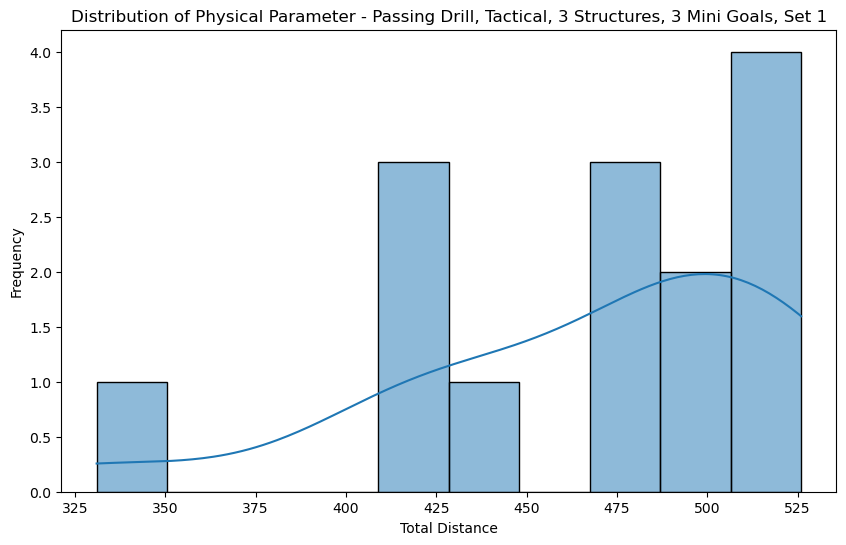

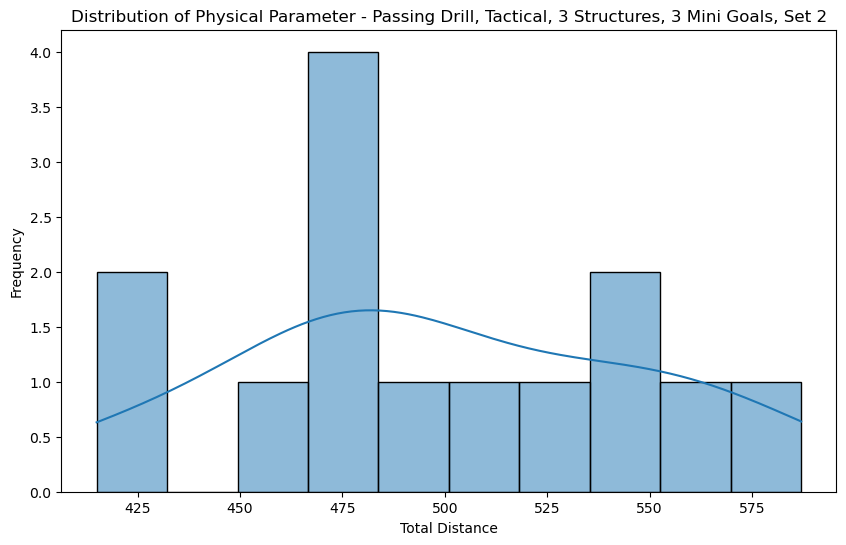

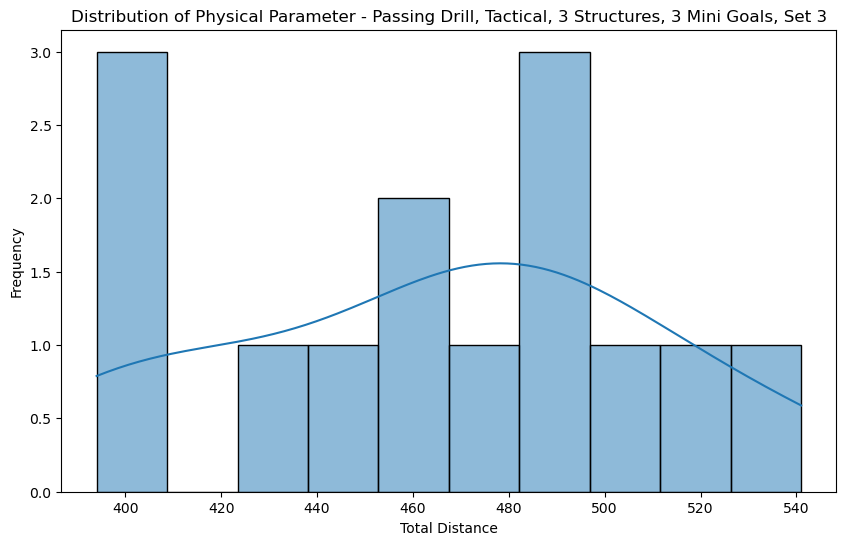

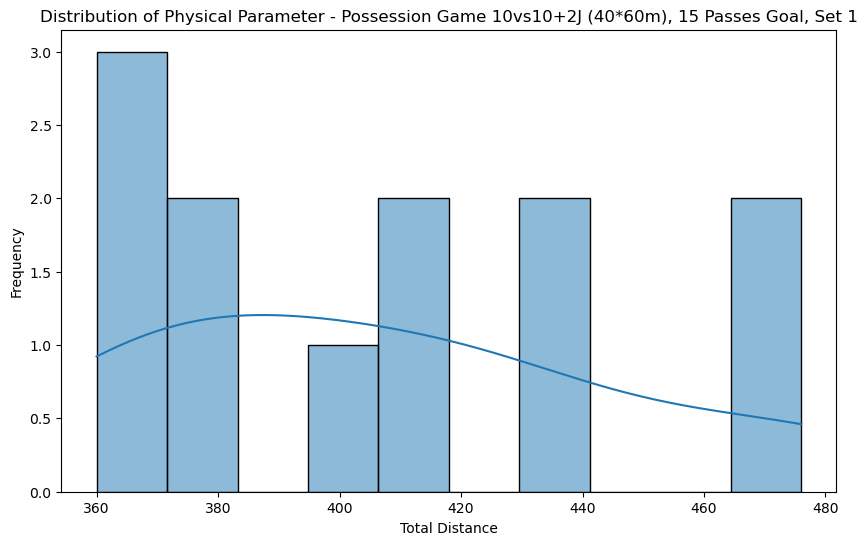

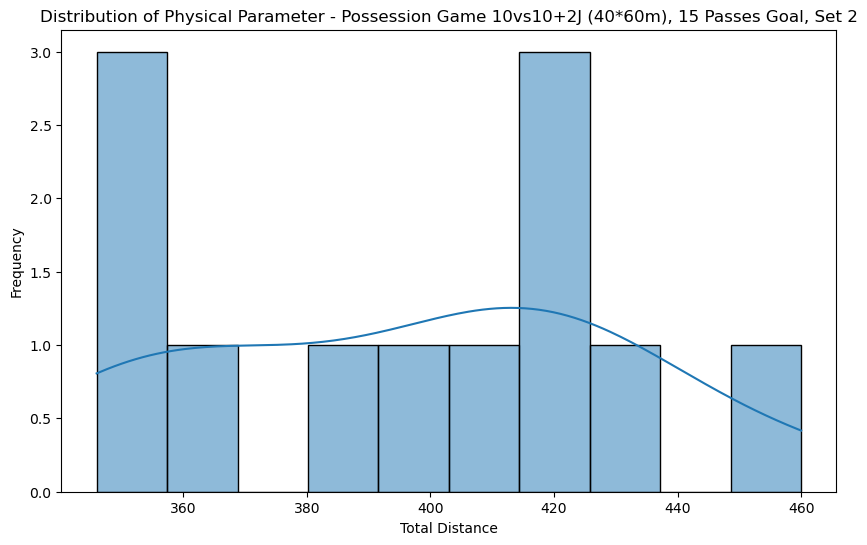

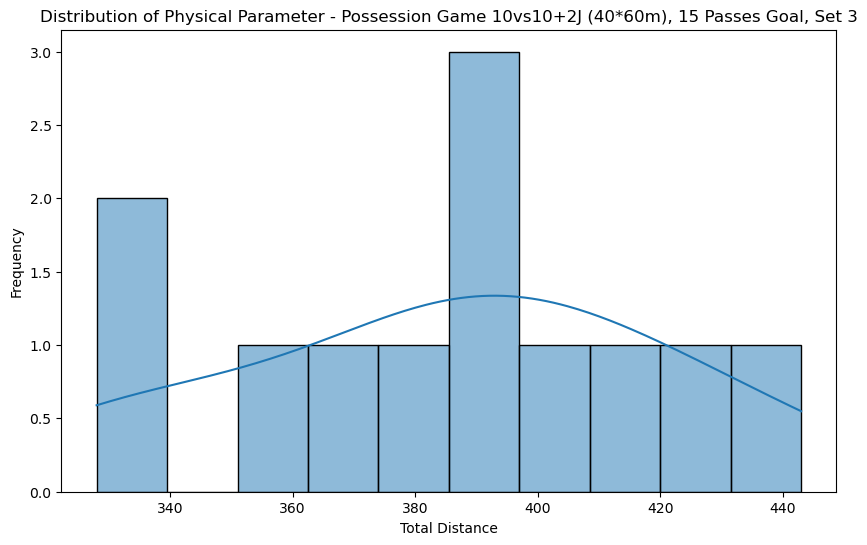

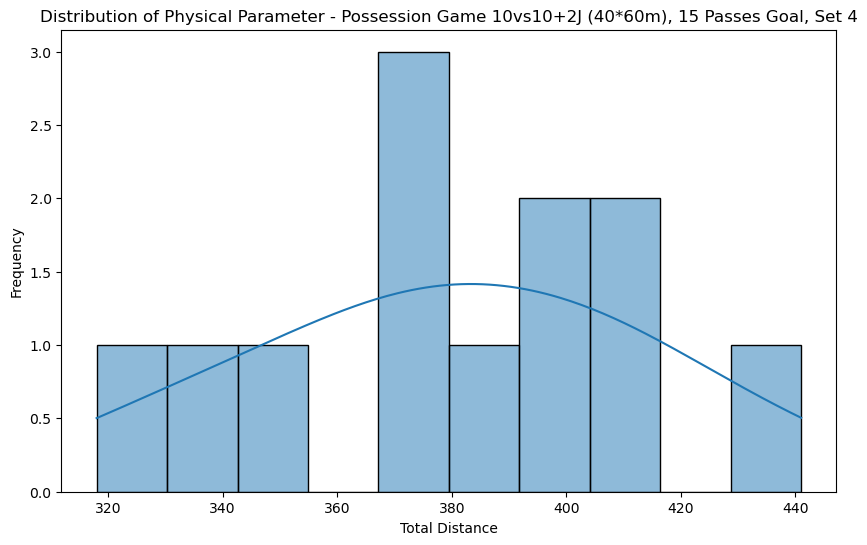

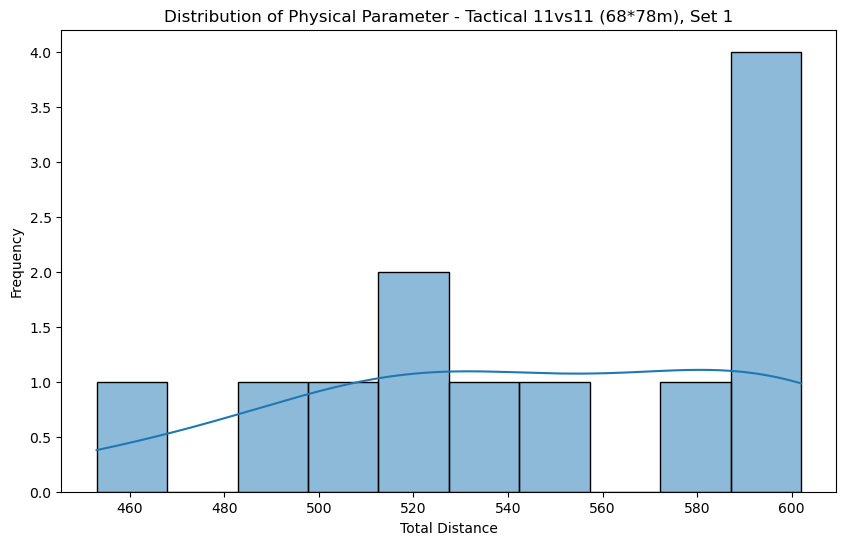

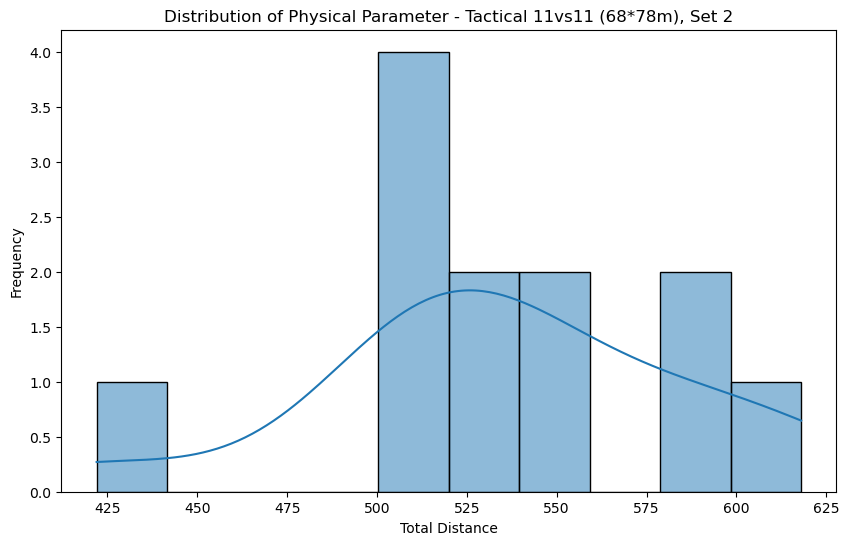

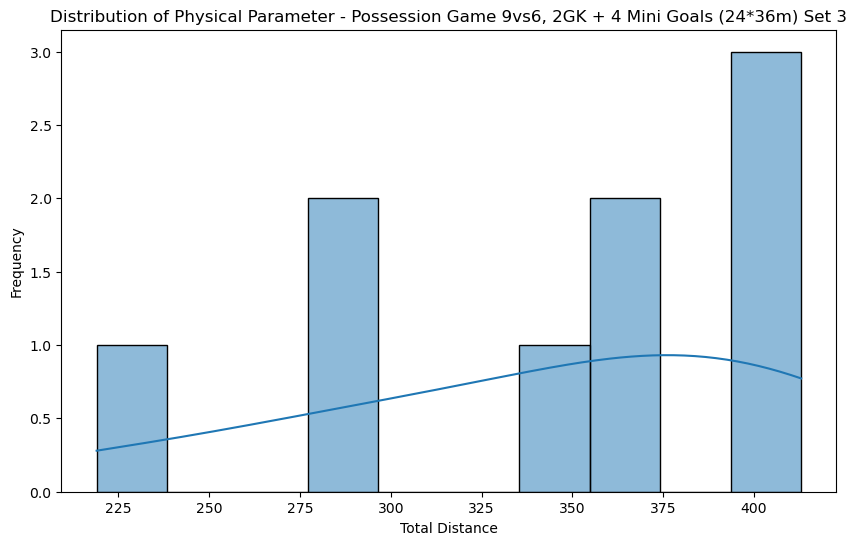

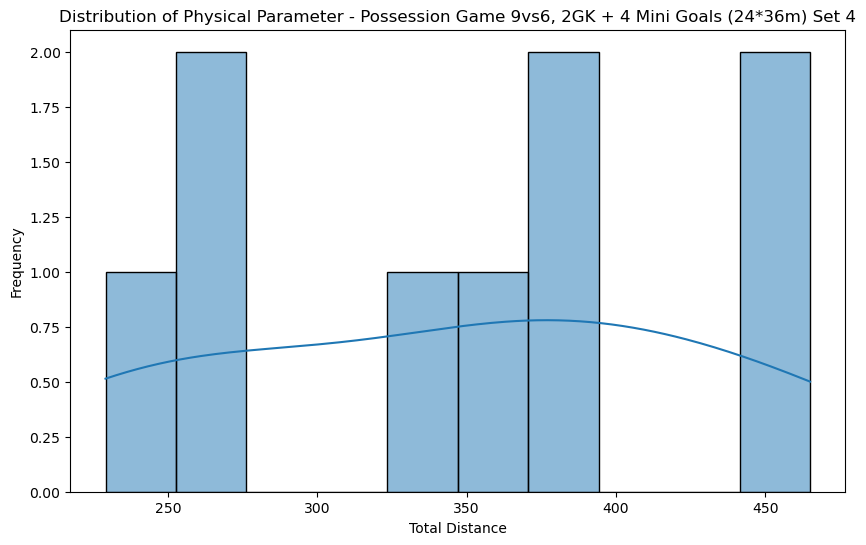

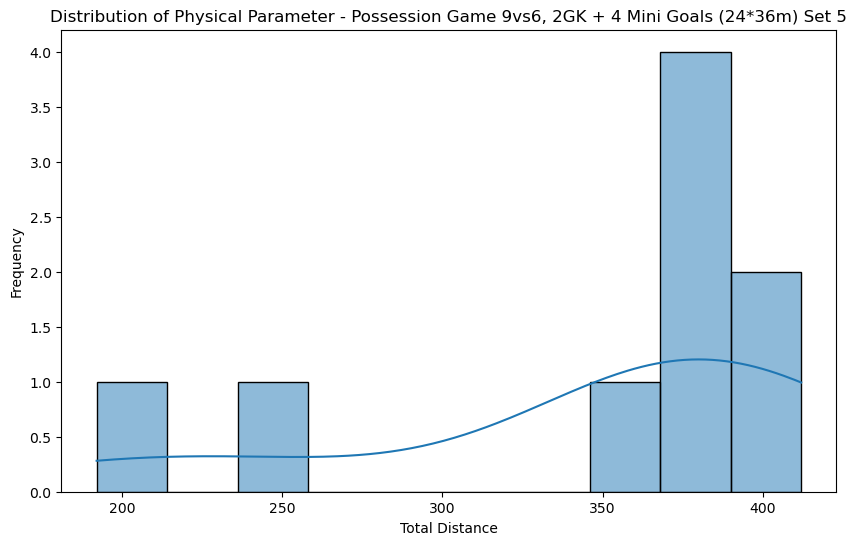

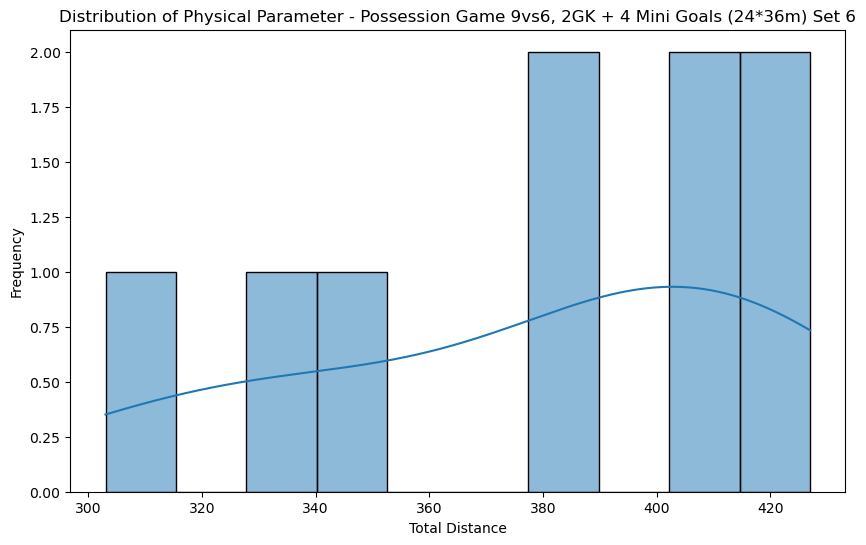

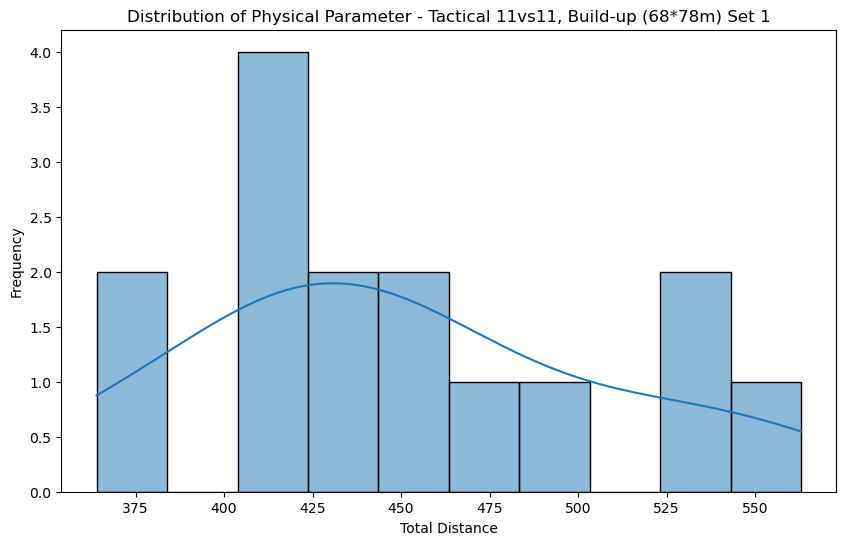

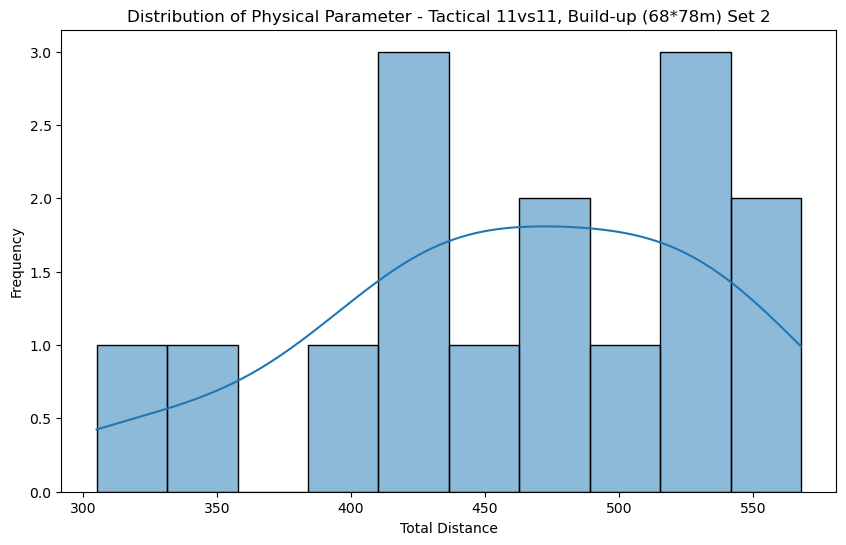

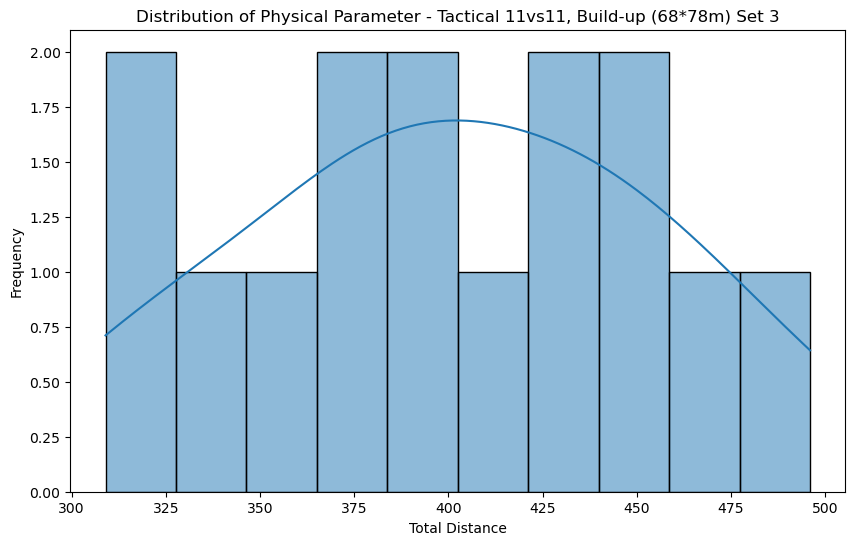

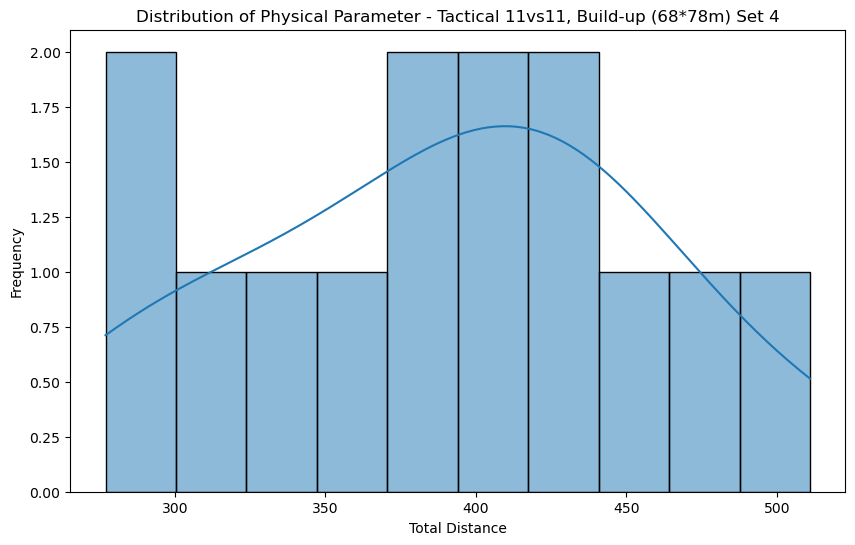

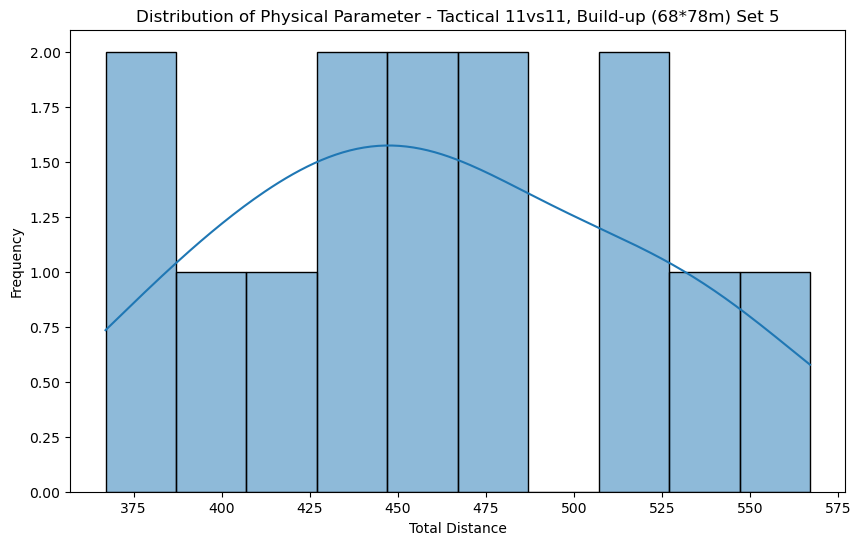

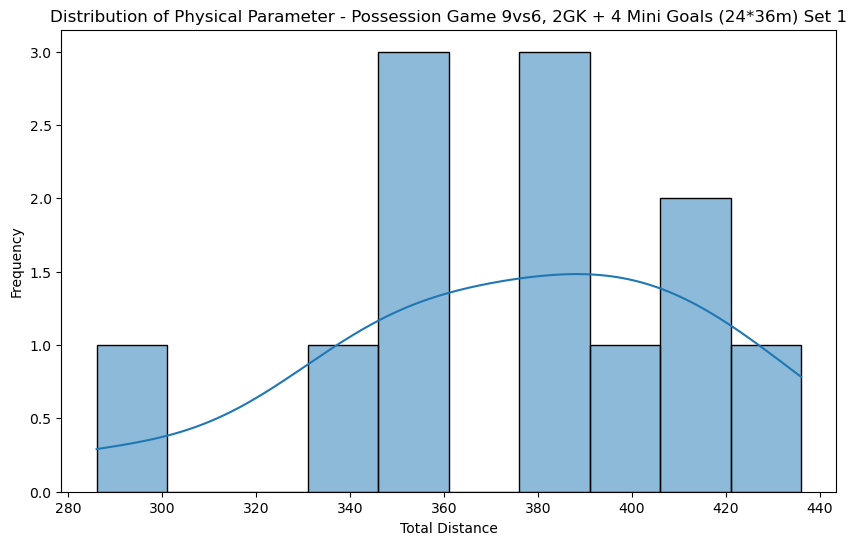

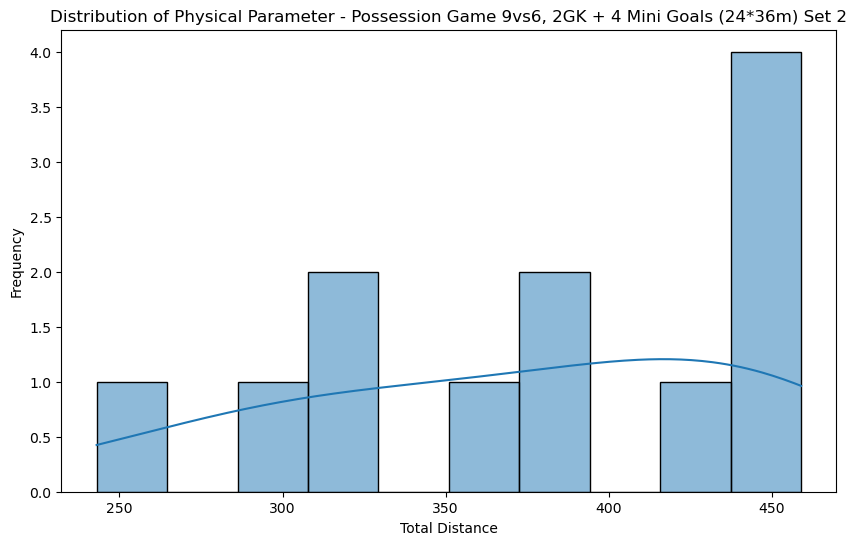

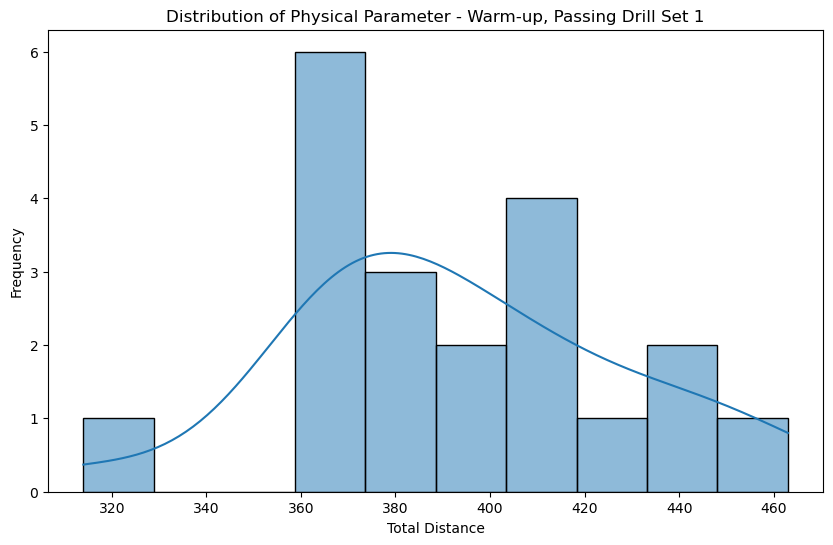

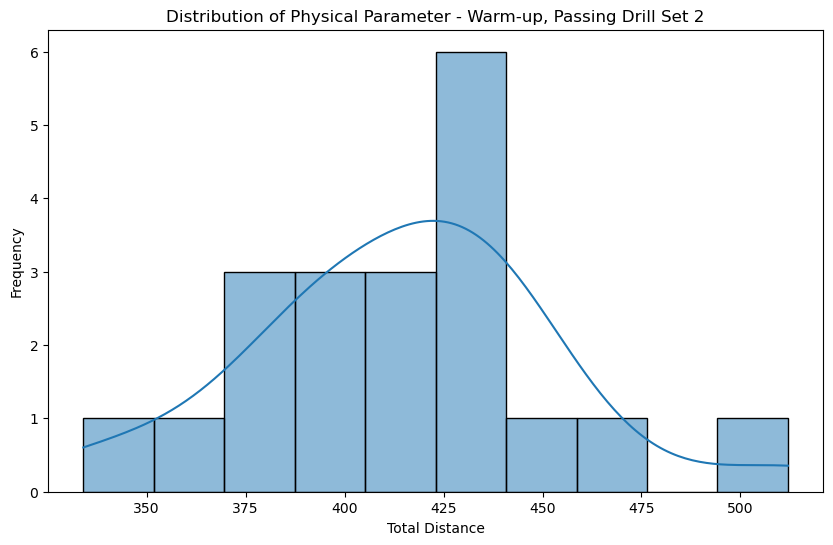

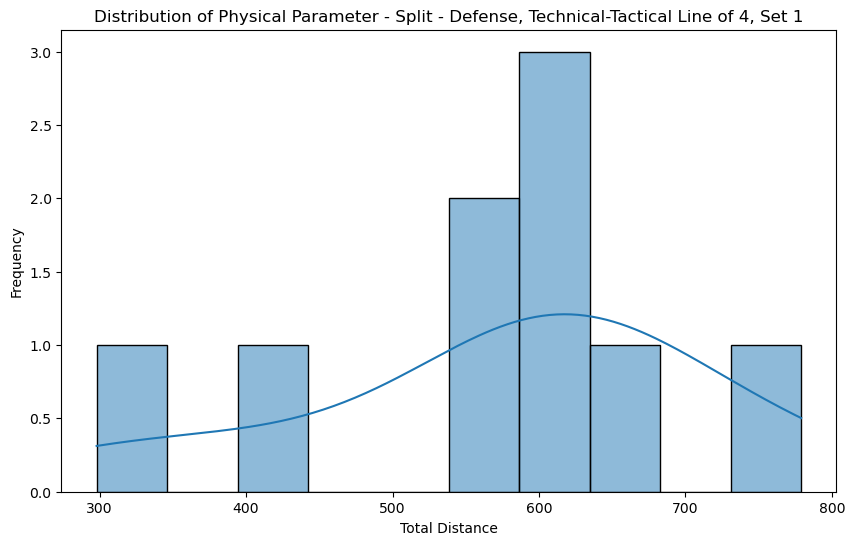

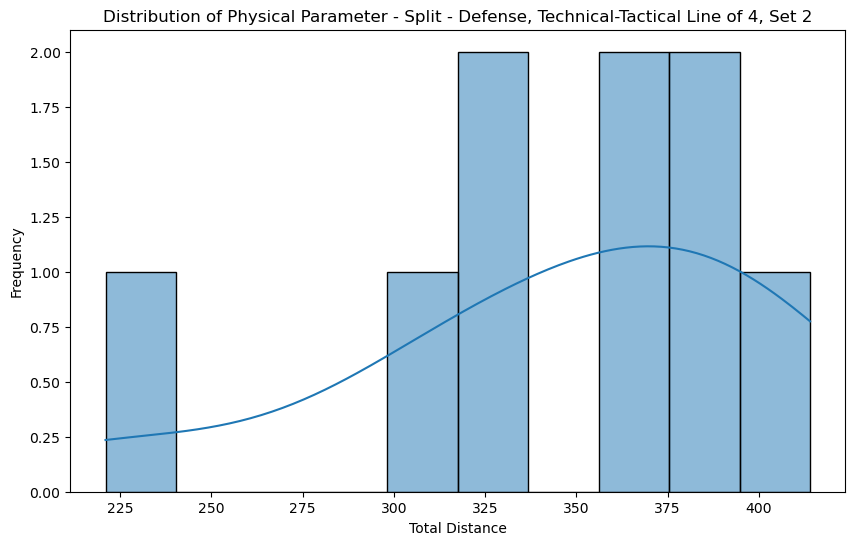

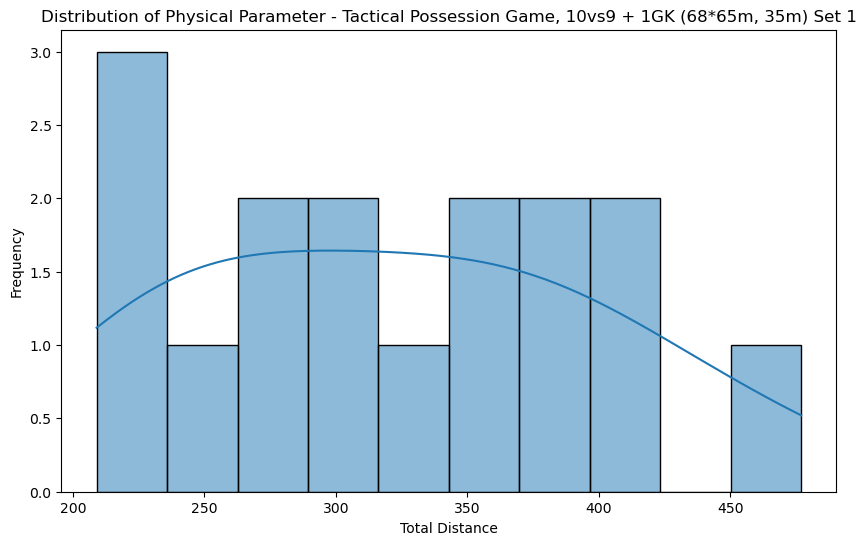

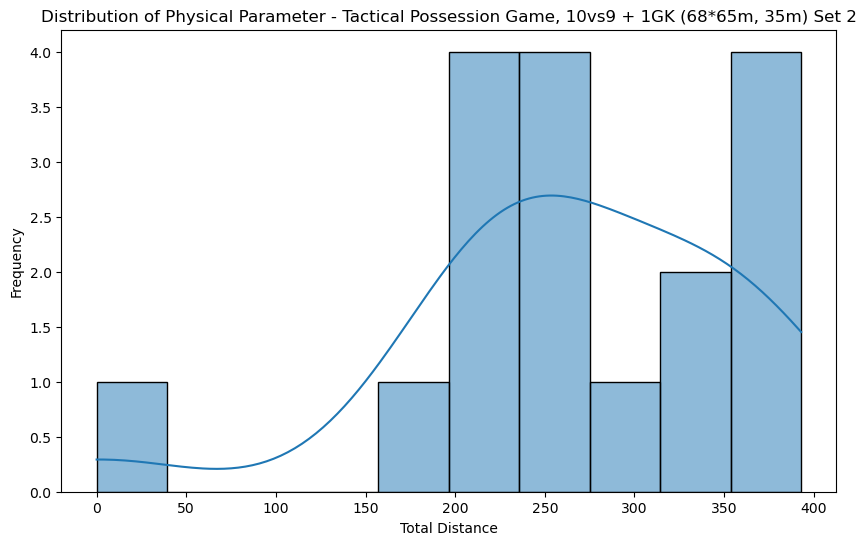

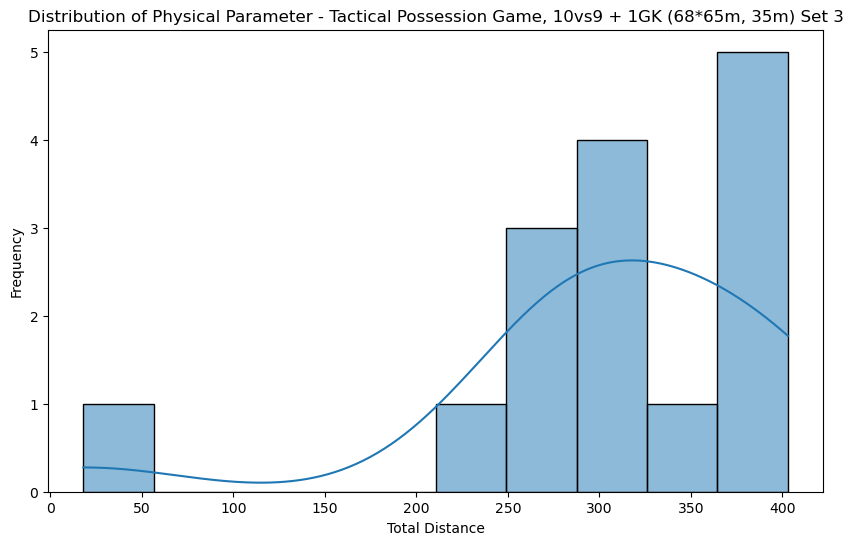

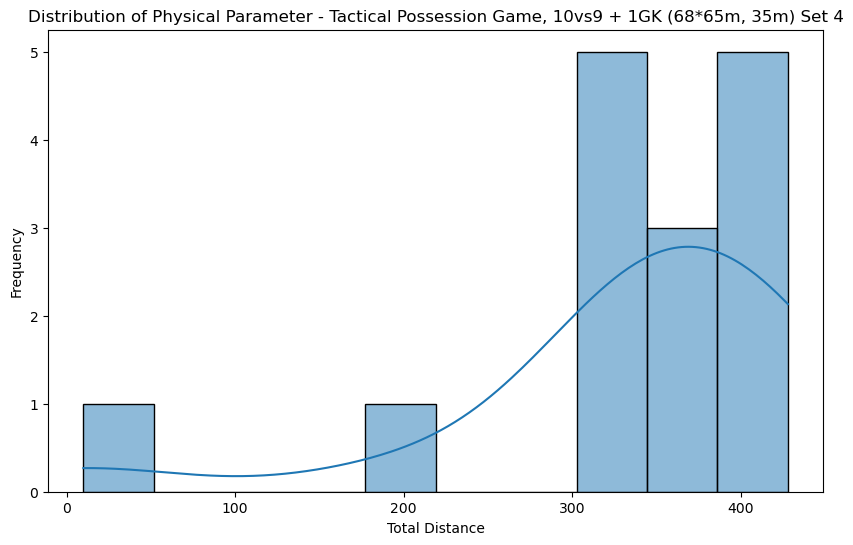

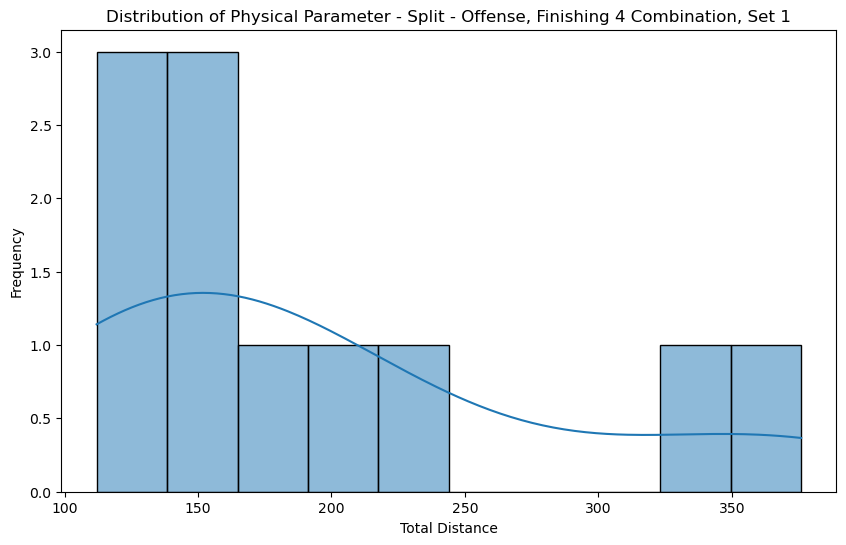

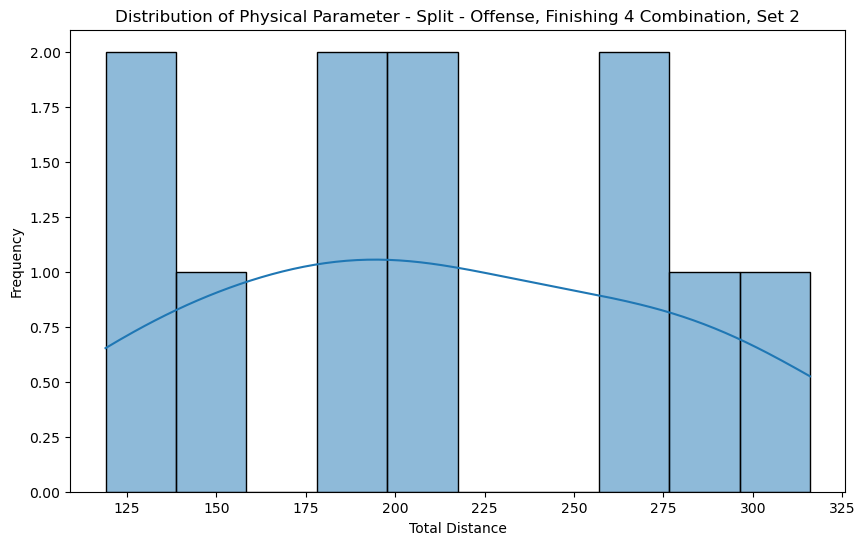

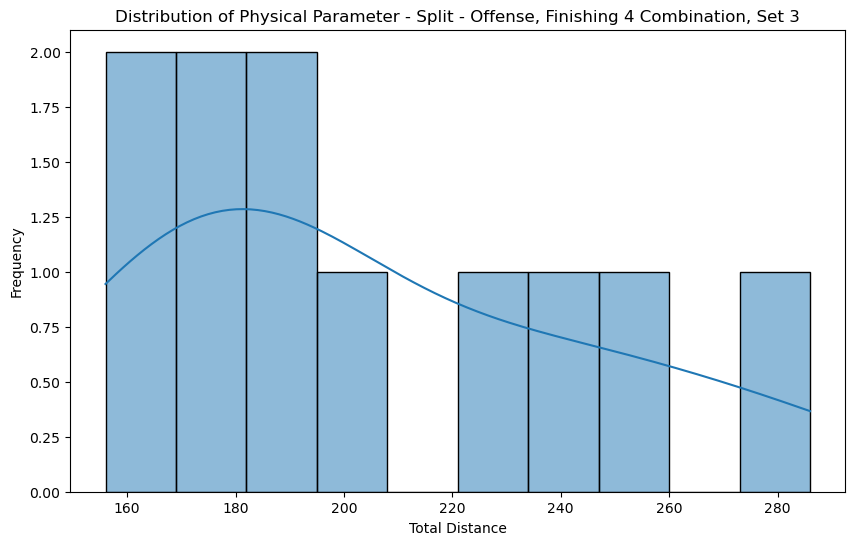

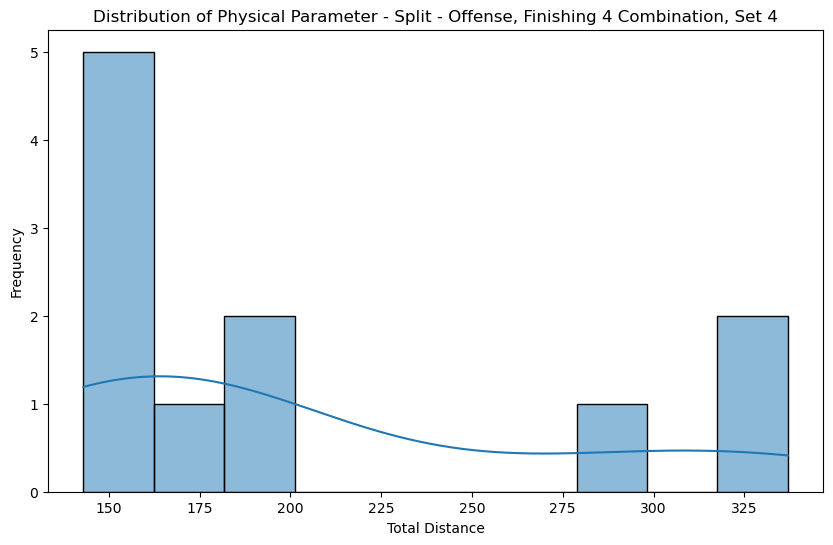

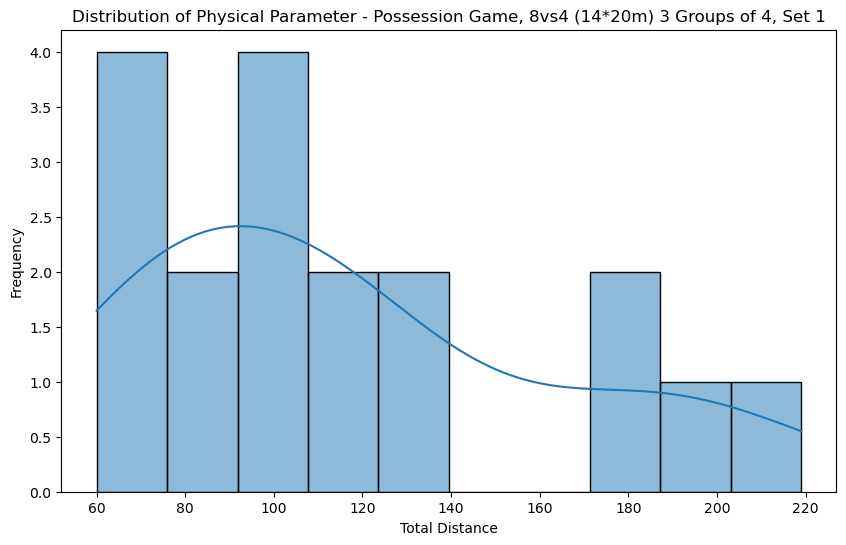

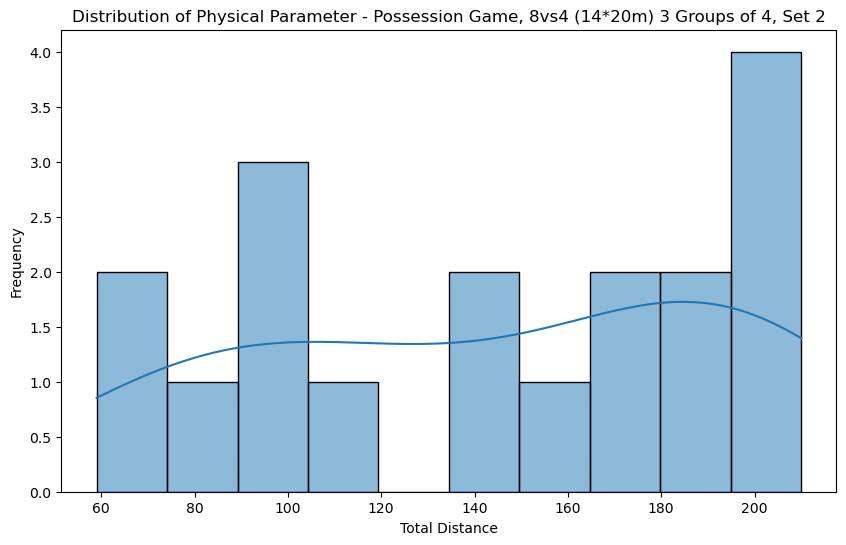

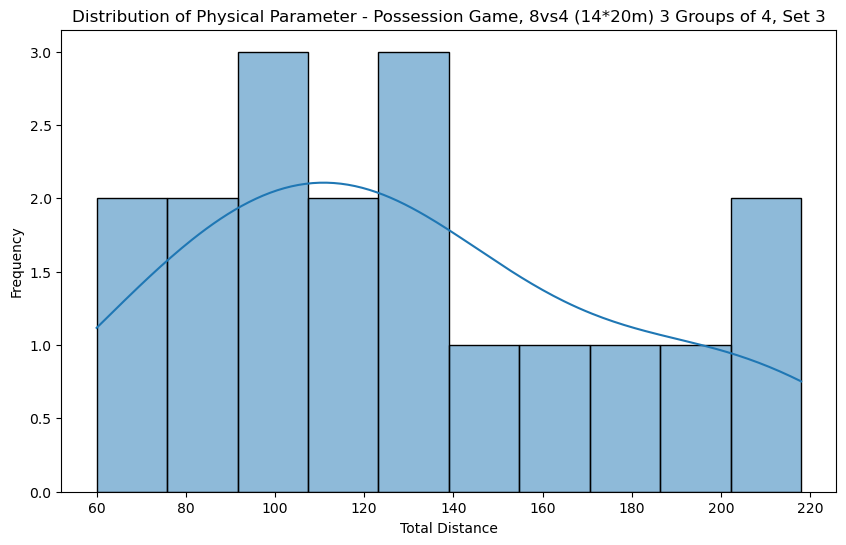

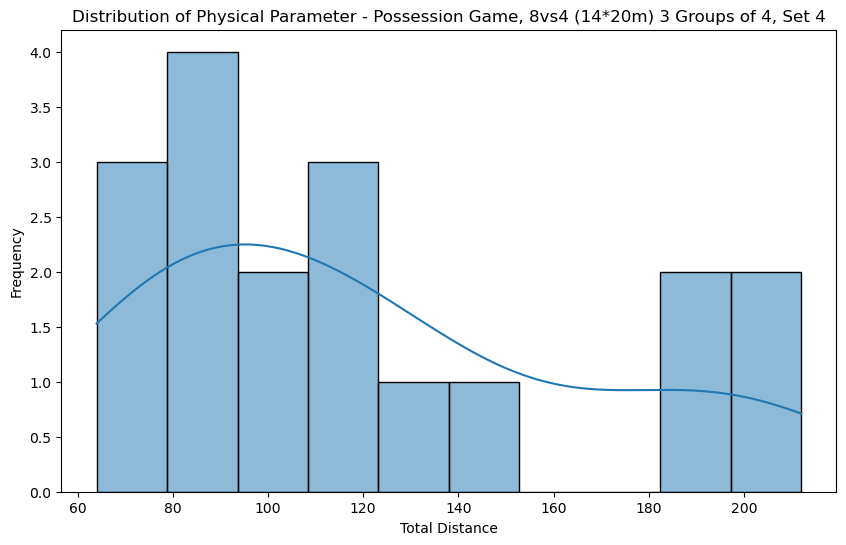

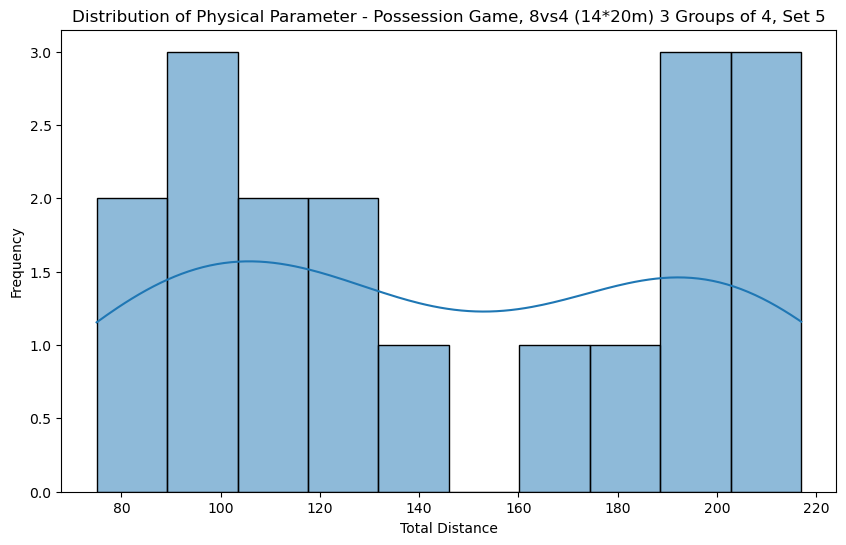

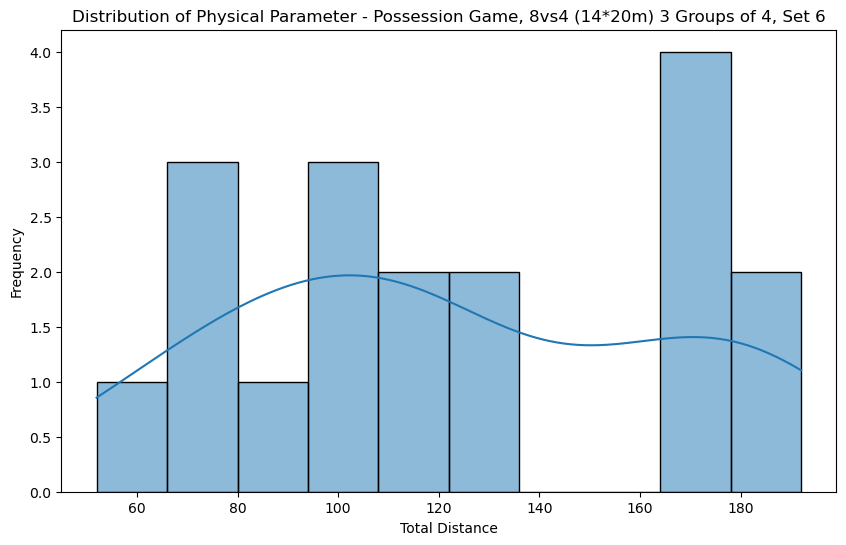

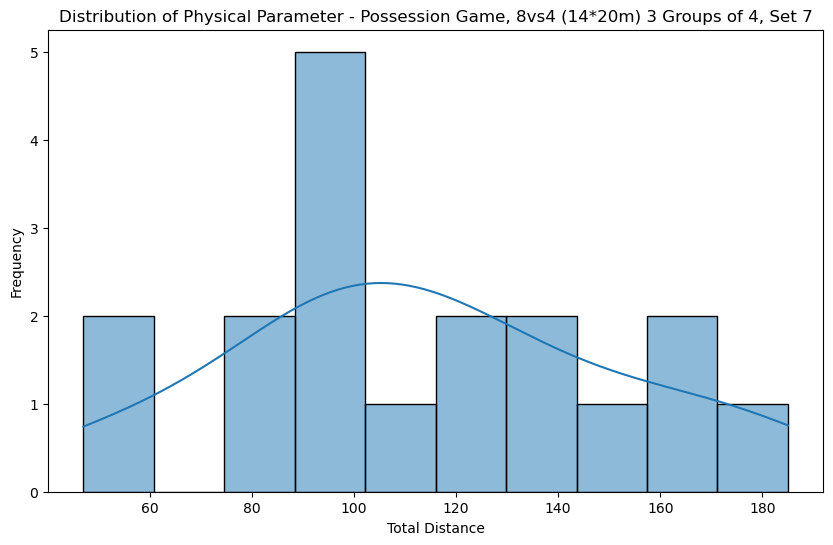

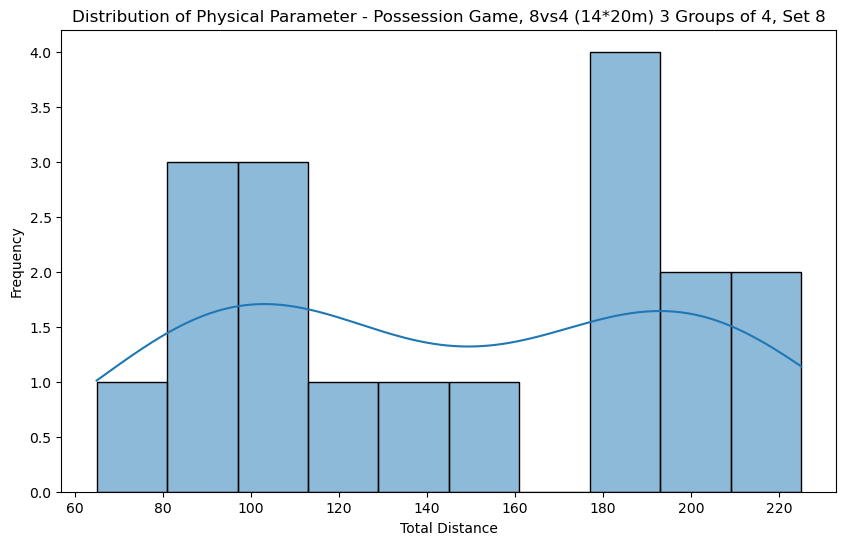

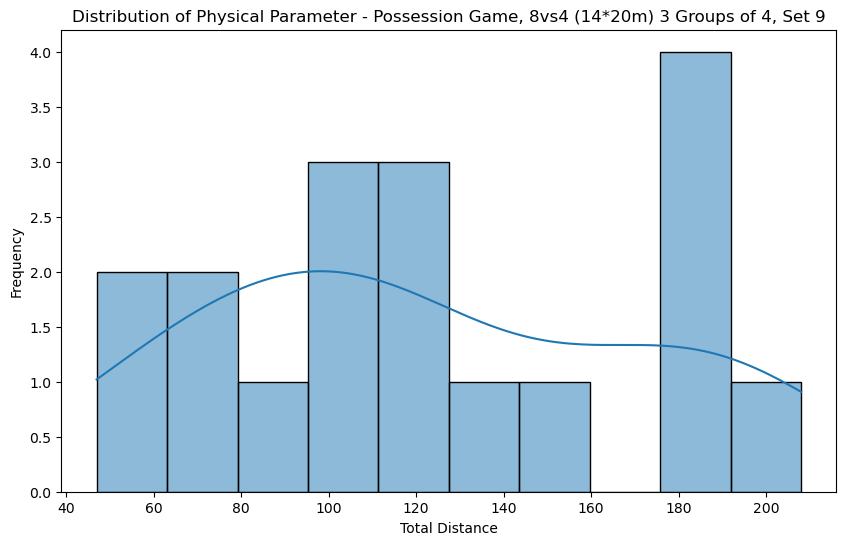

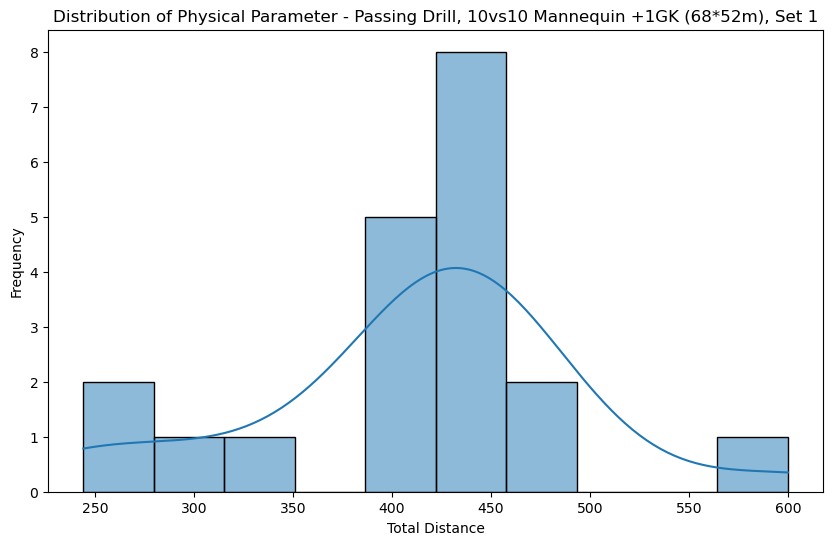

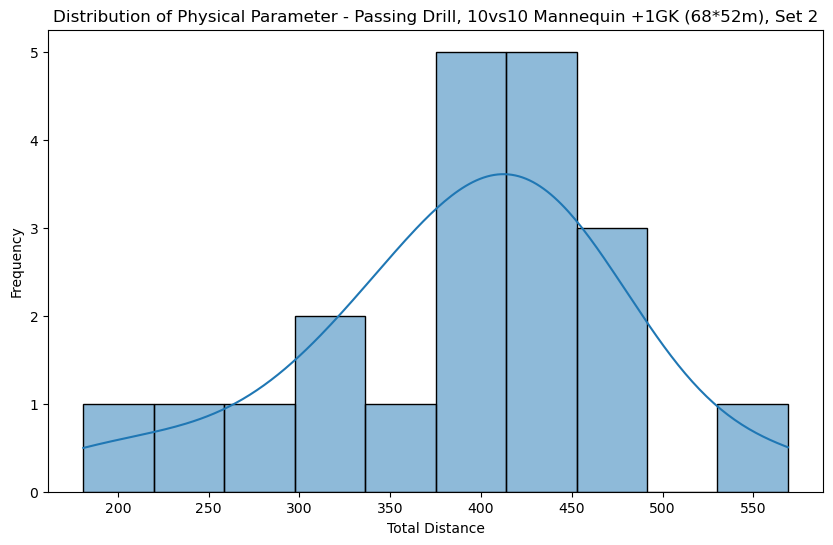

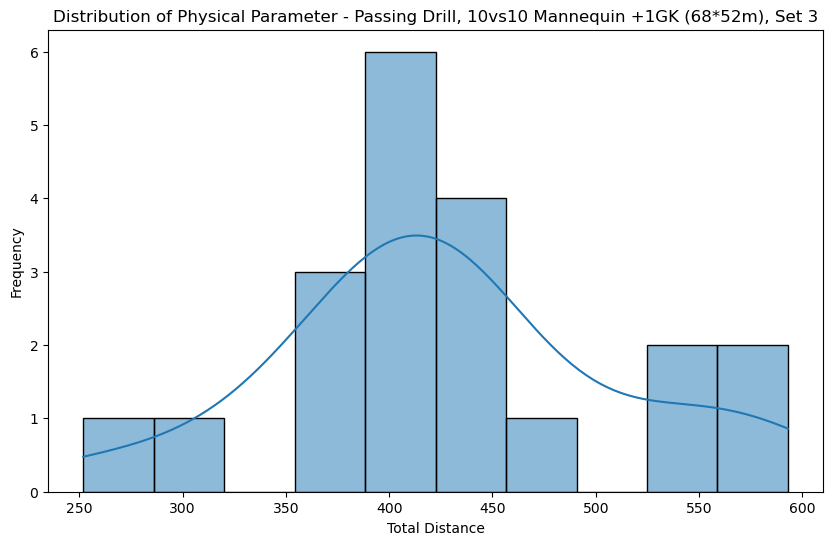

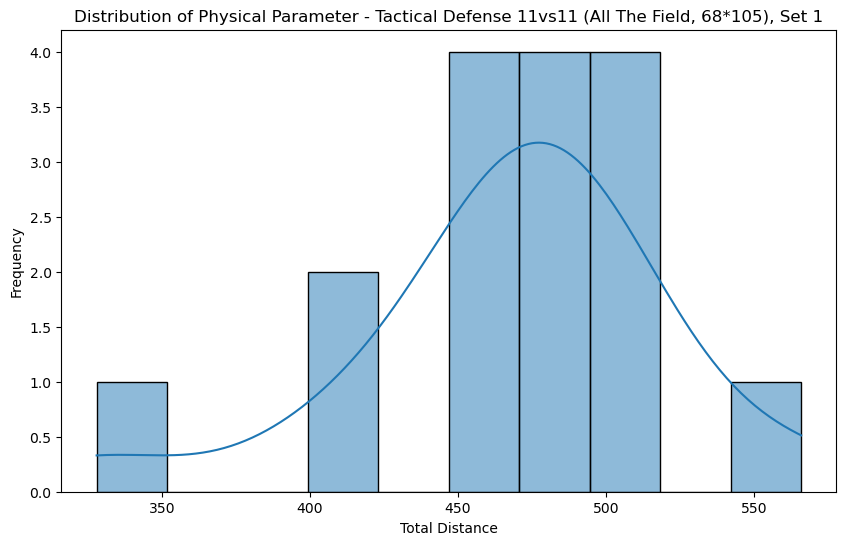

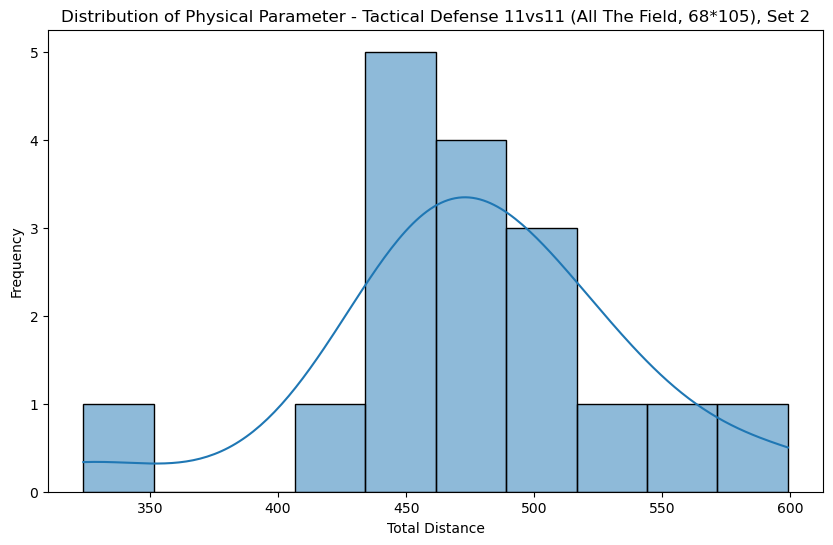

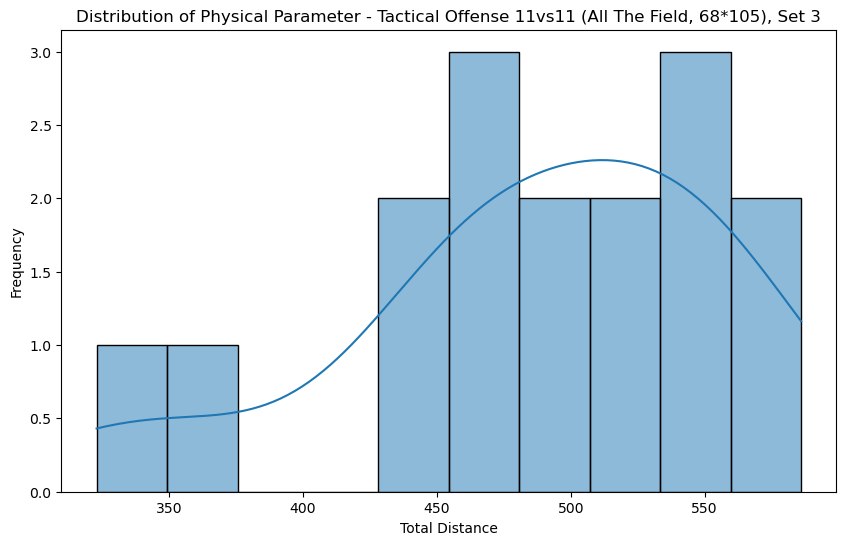

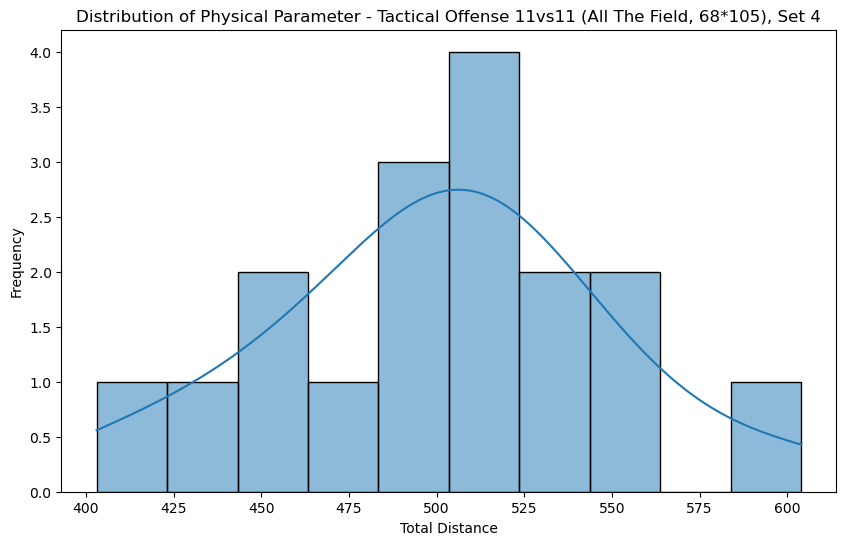

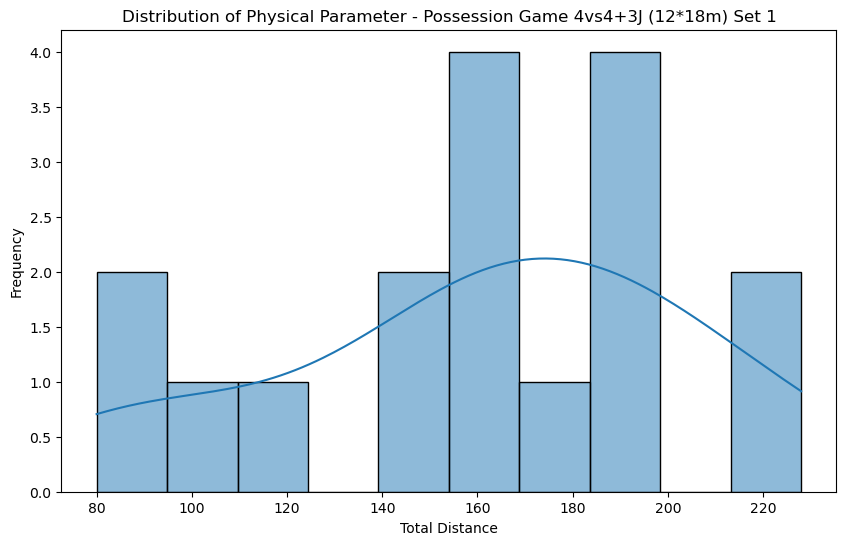

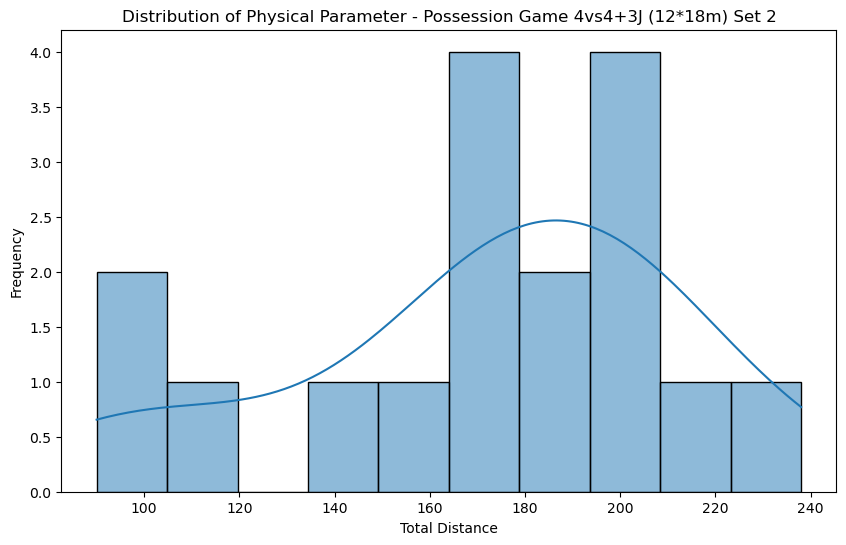

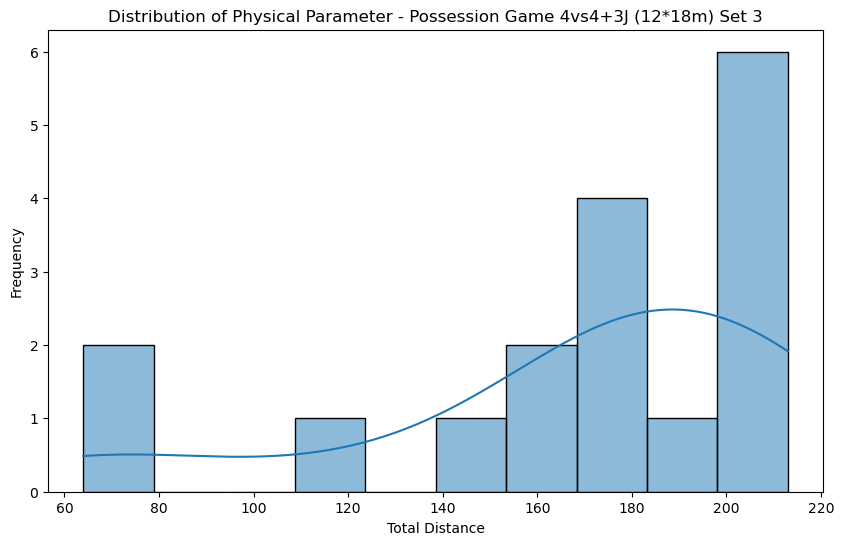

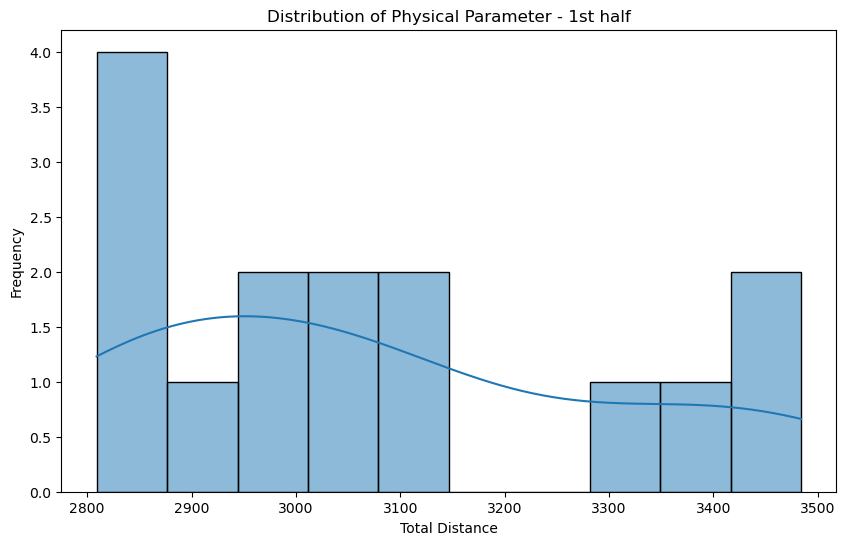

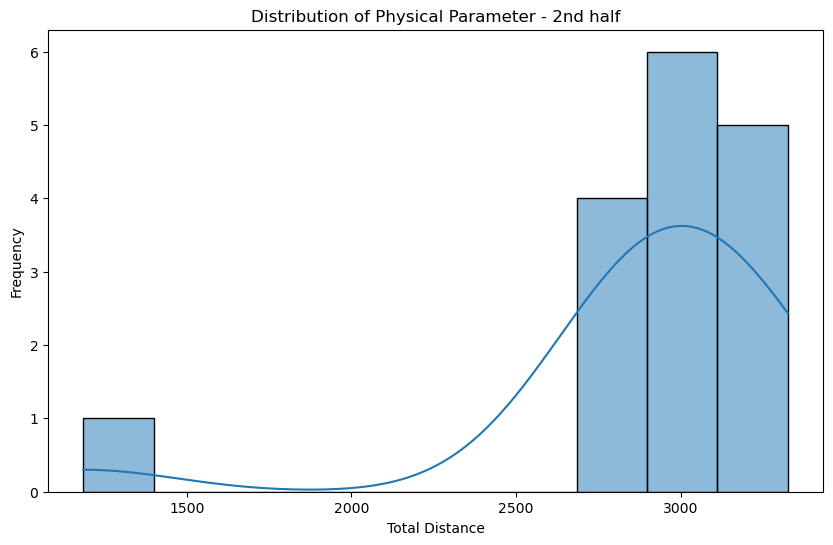

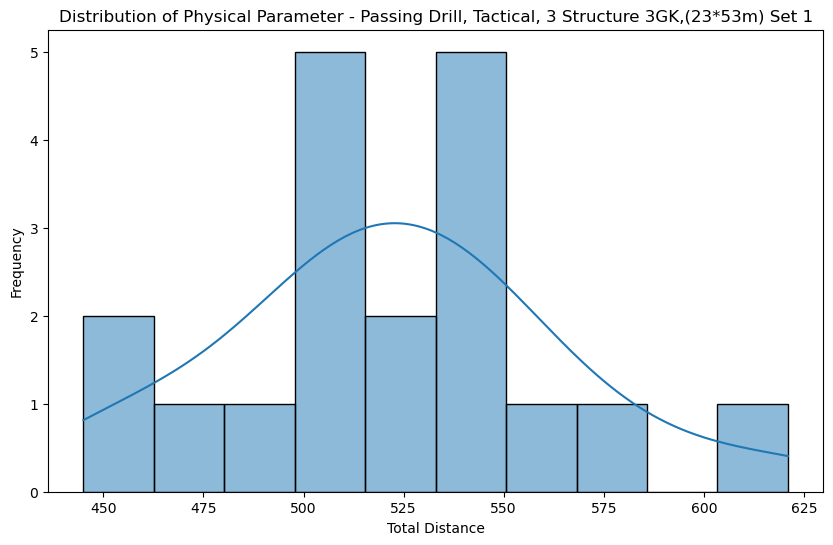

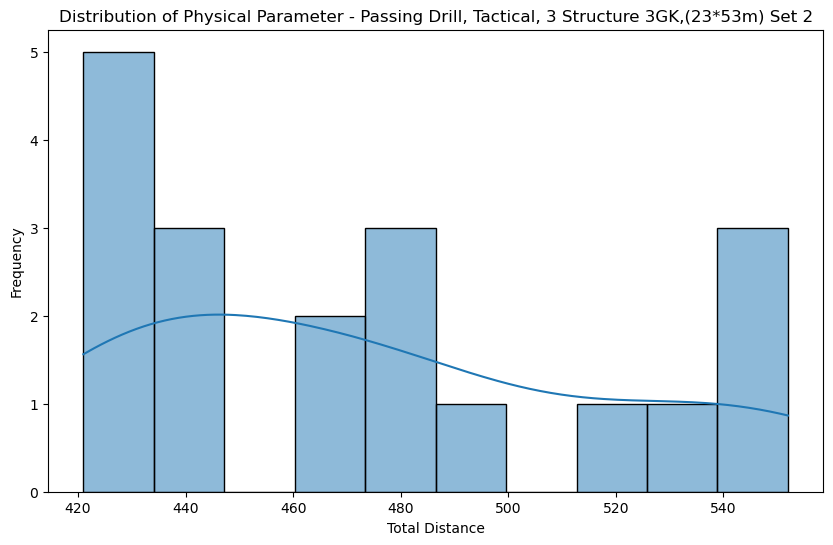

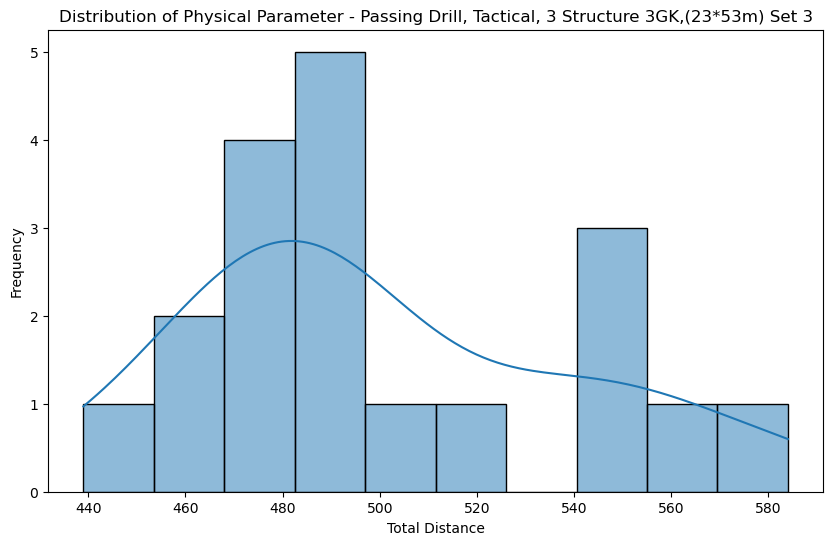

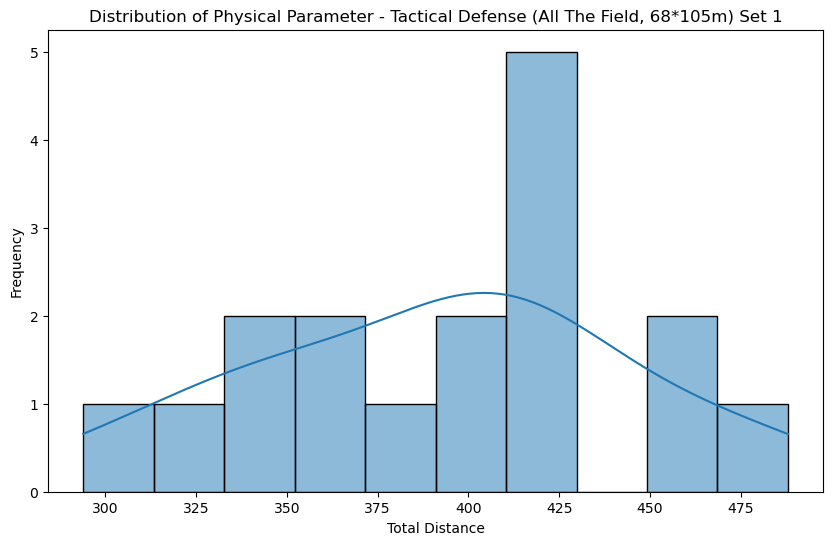

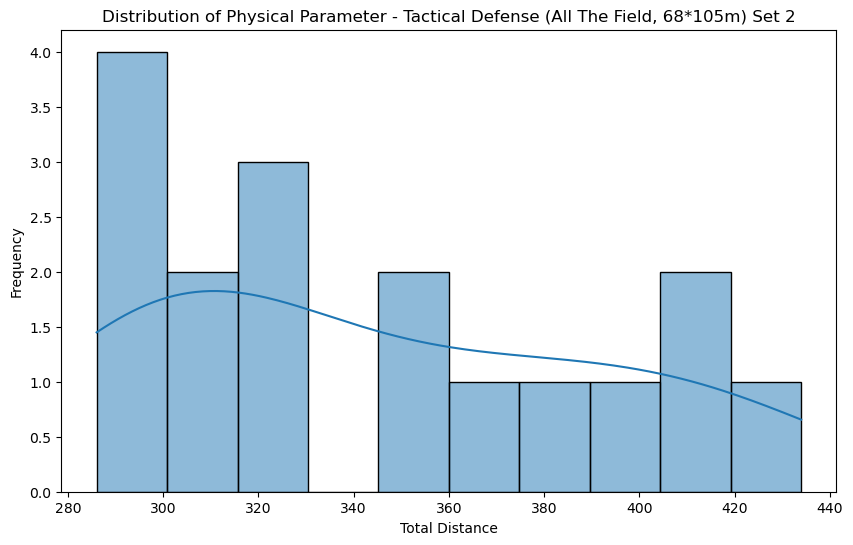

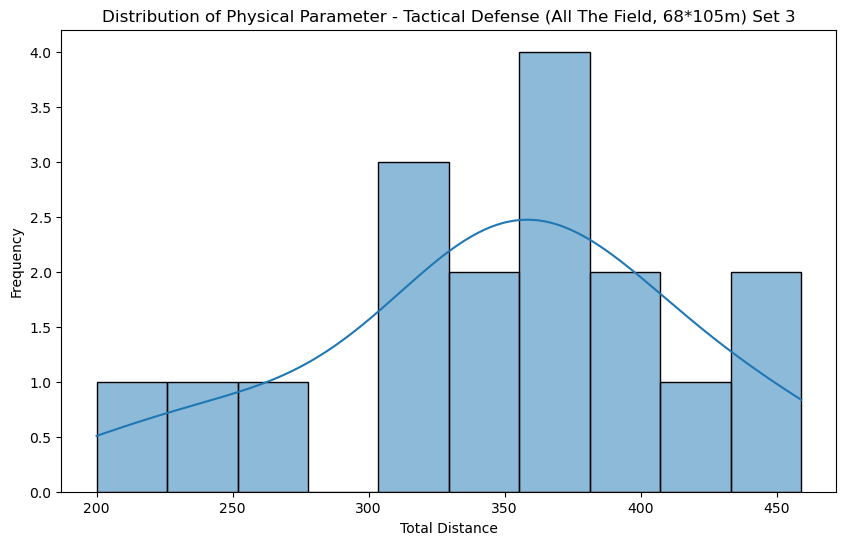

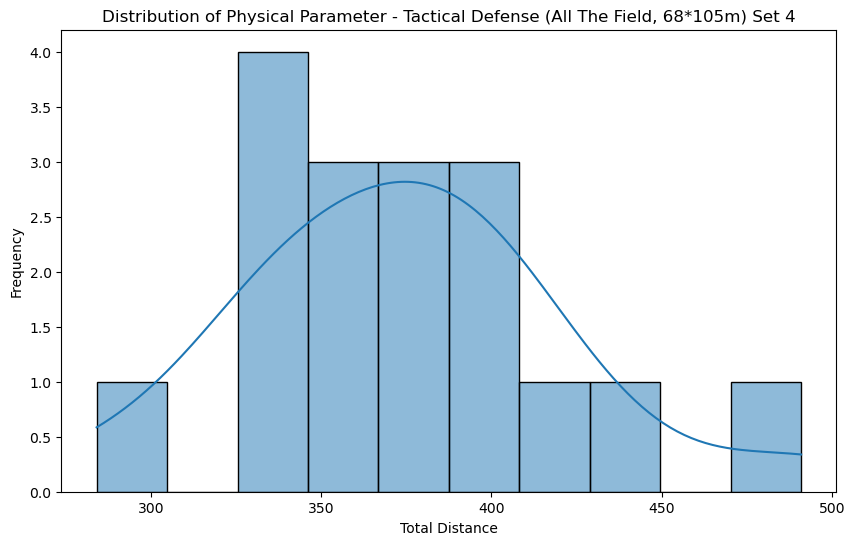

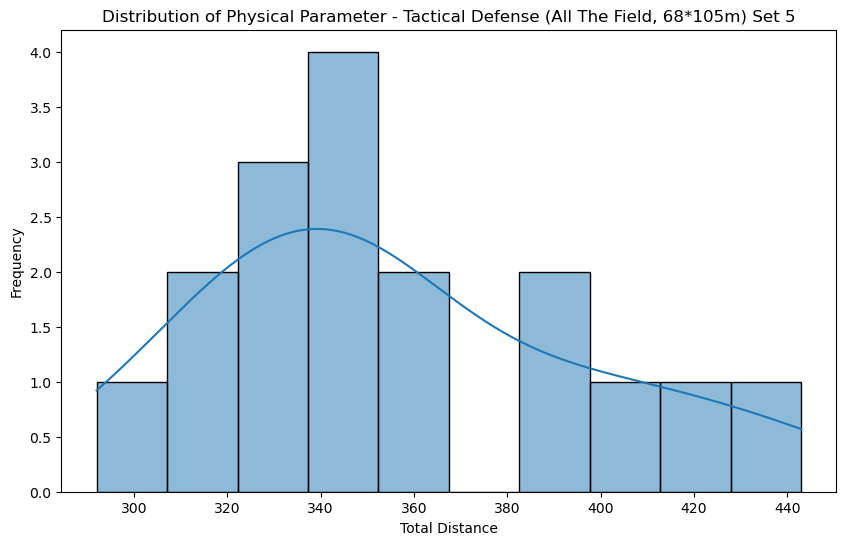

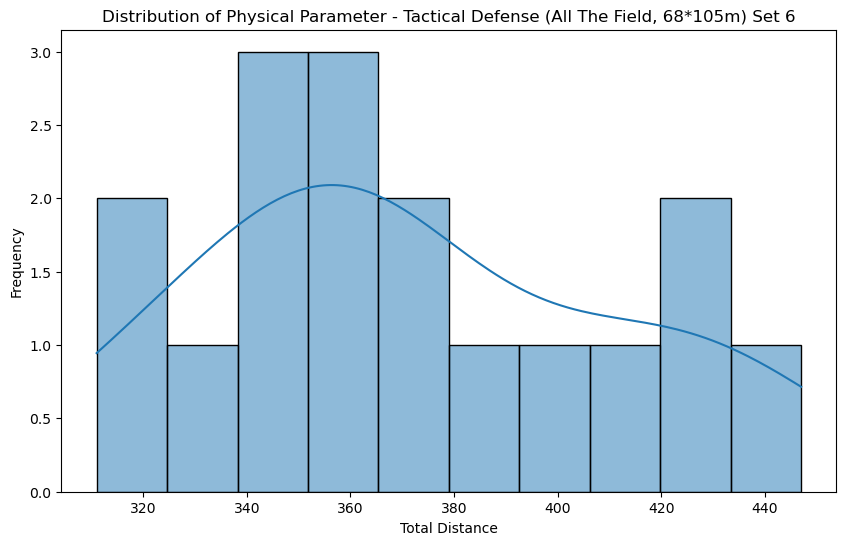

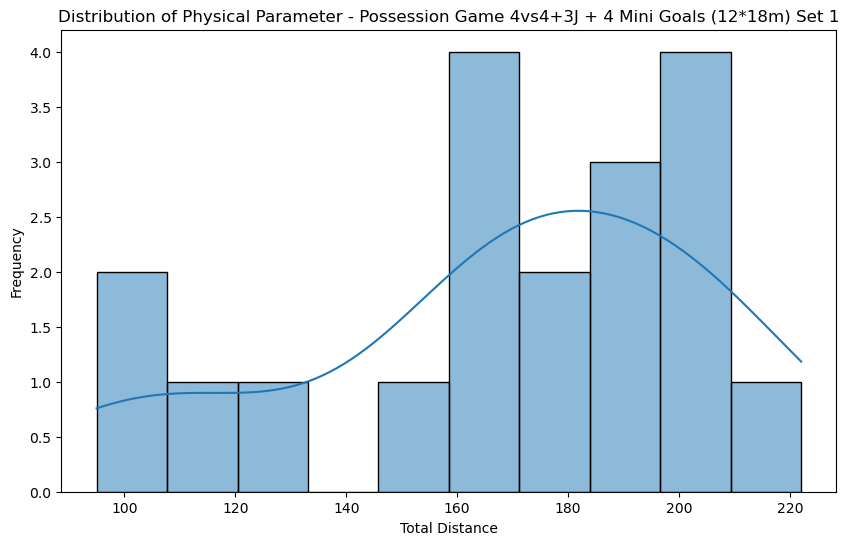

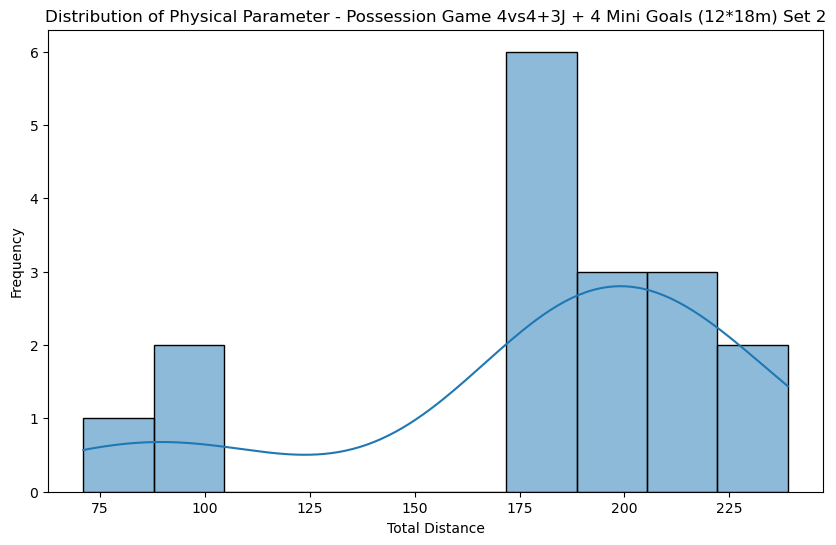

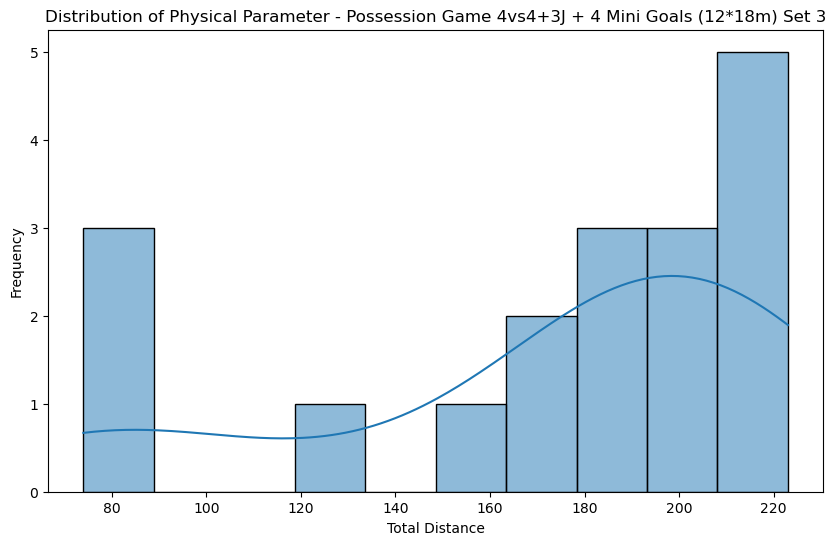

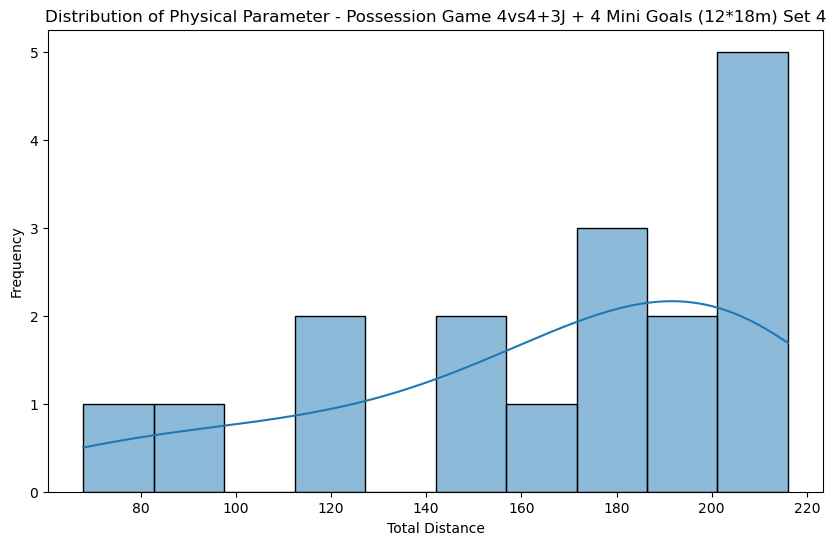

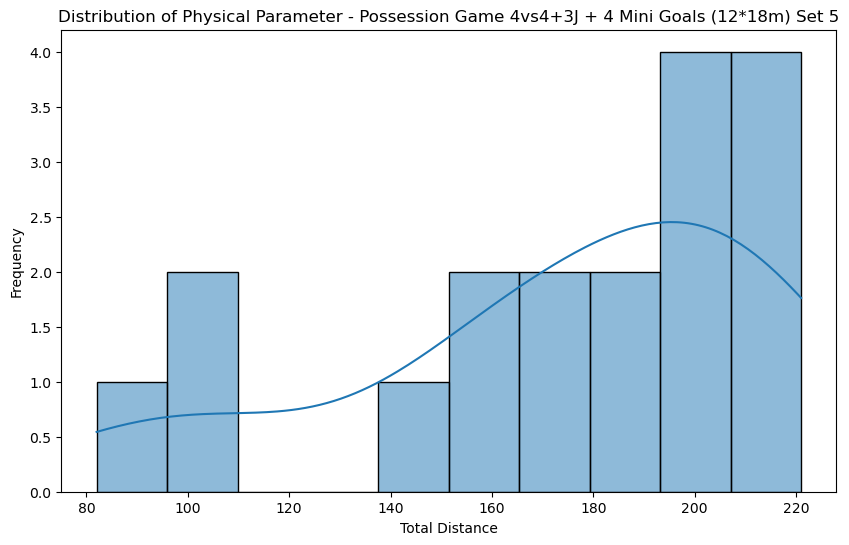

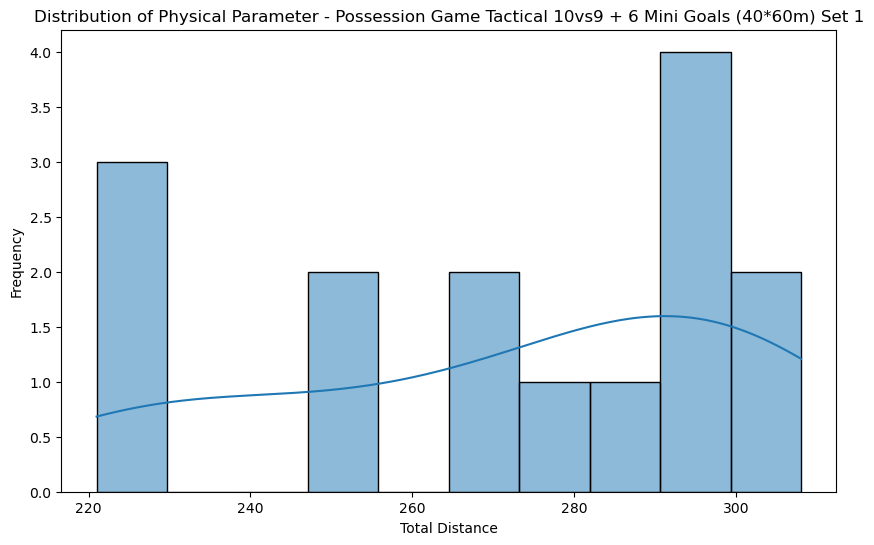

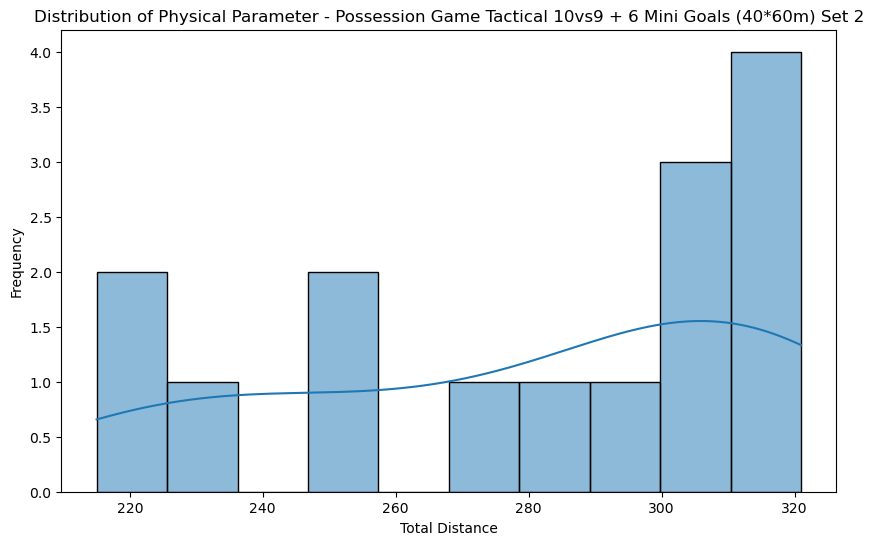

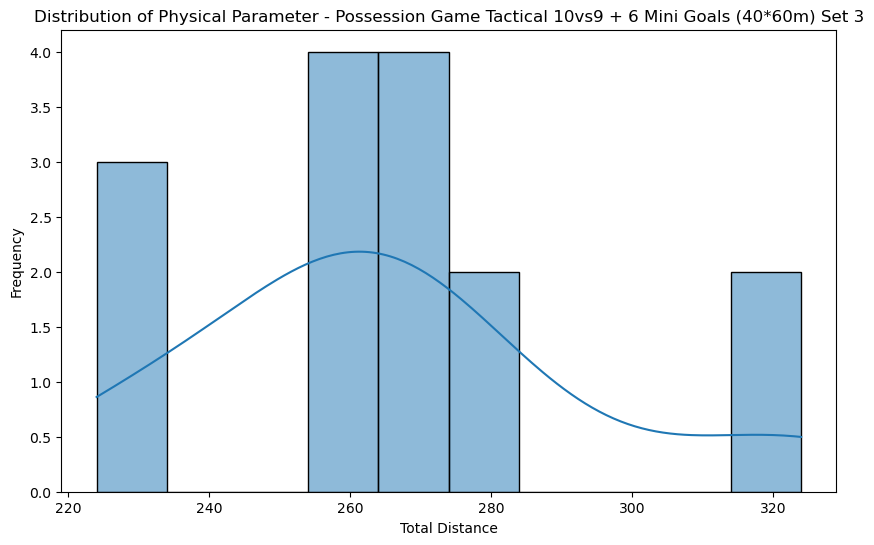

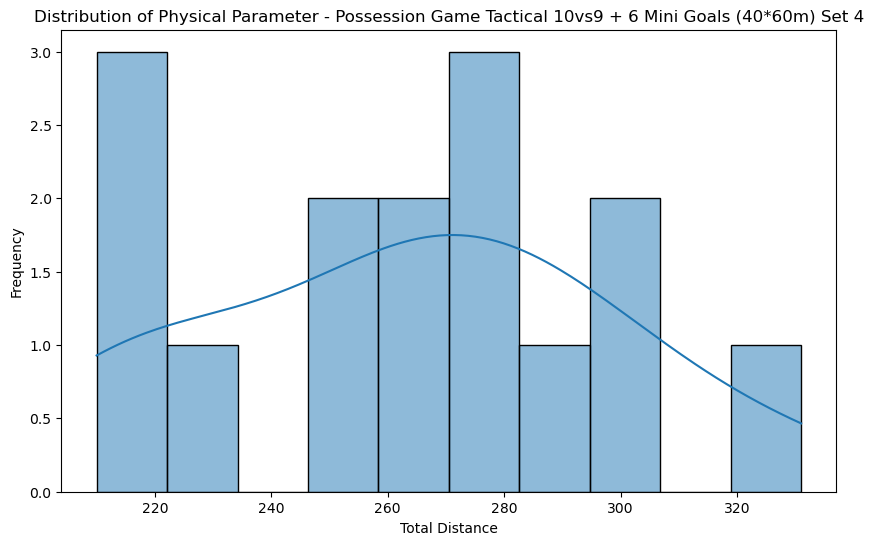

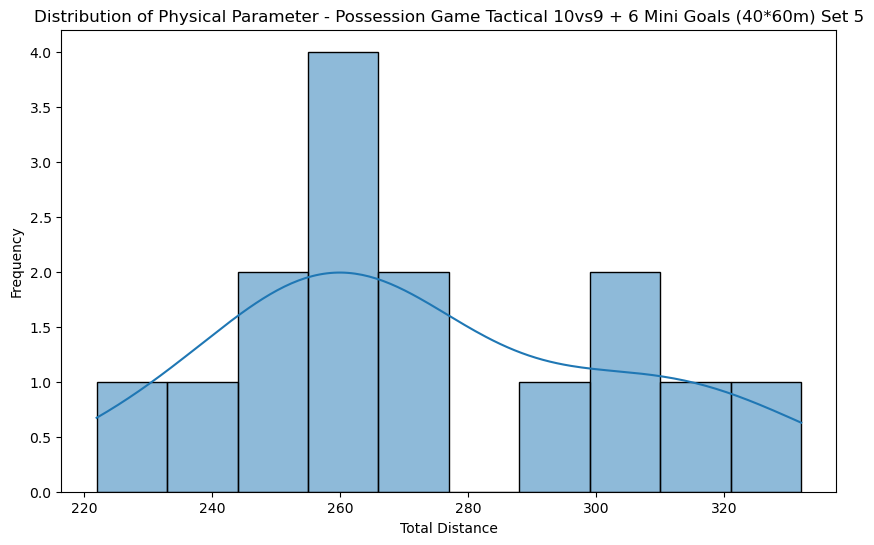

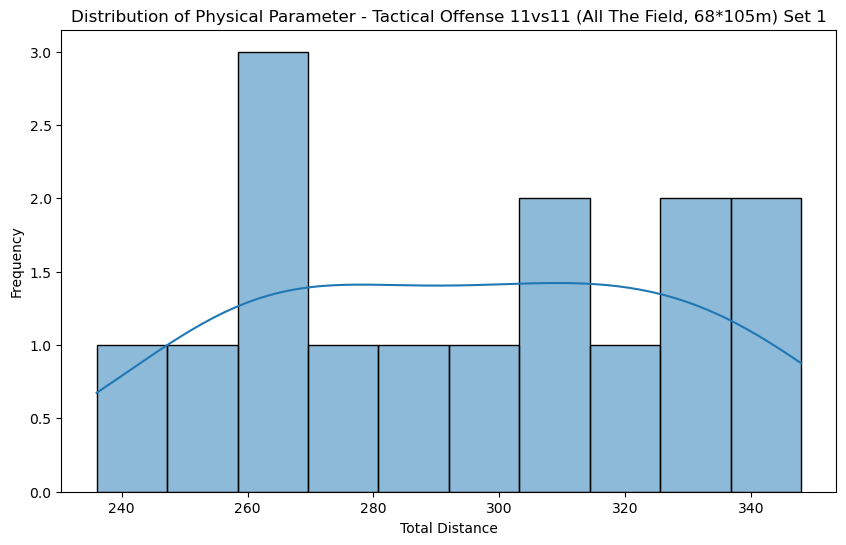

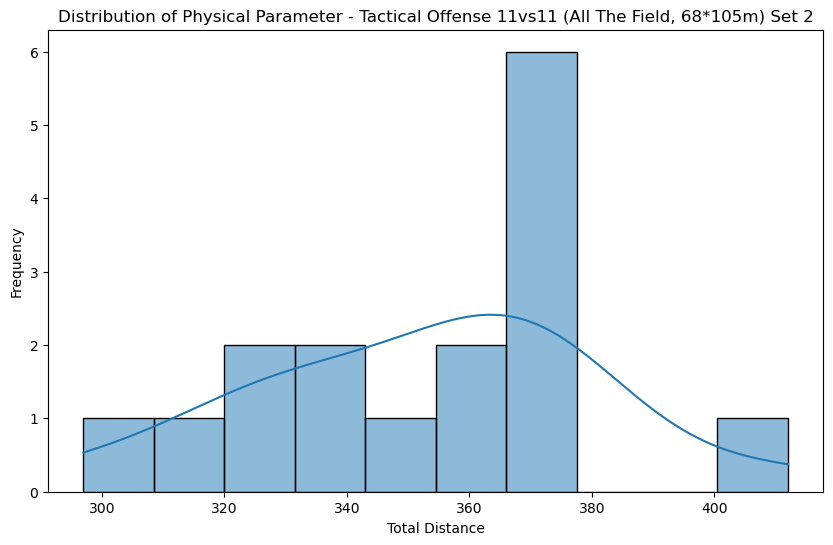

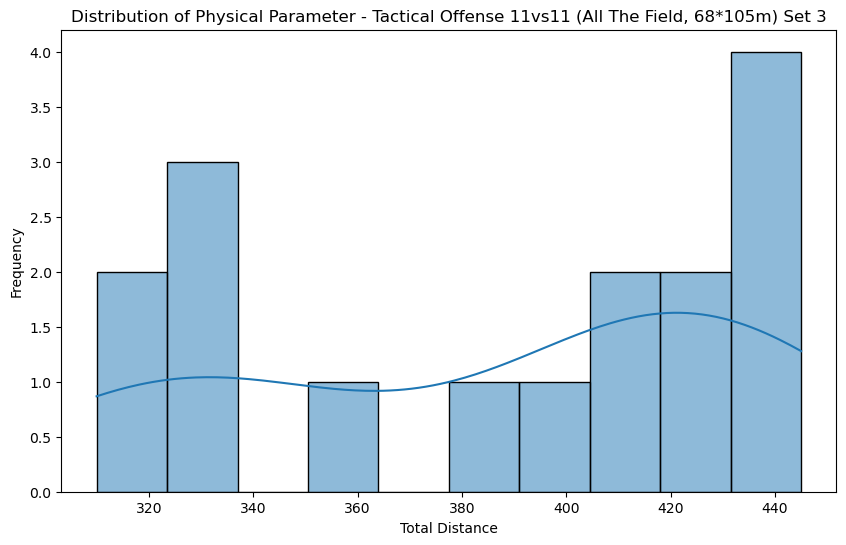

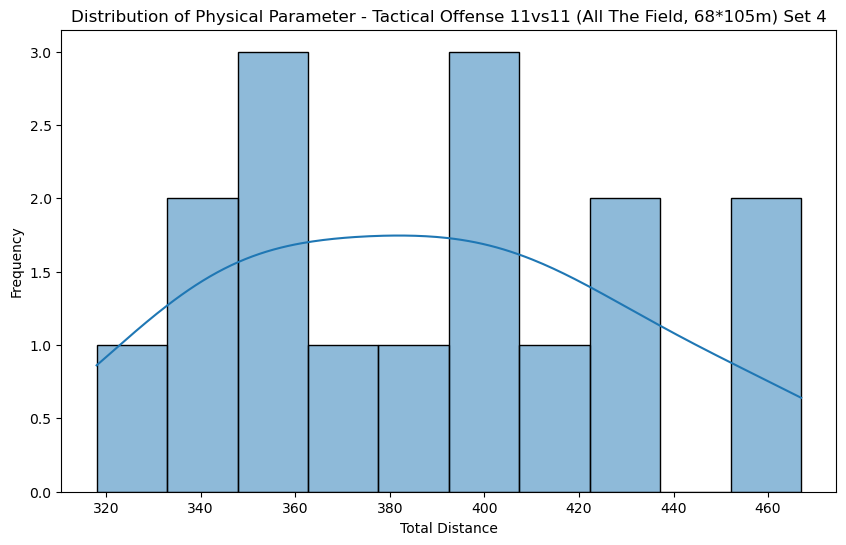

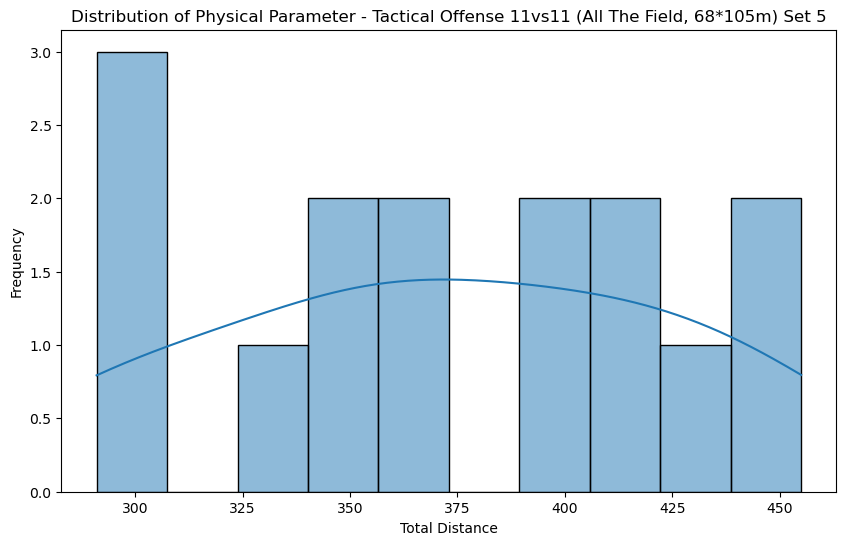

In [25]:
for training_title, training_data in training_data_segments.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(training_data['Total Distance'], bins=10, kde=True)
    plt.xlabel('Total Distance')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Physical Parameter - {training_title}')
    plt.show()

In [96]:
total_distance = df['Total Distance']
total_distance_stats = total_distance.agg(['mean','median','std','min','max','sum','count'])
print(total_distance_stats)

mean         393.538462
median       351.000000
std          450.923589
min            0.000000
max         3484.000000
sum       465556.000000
count       1183.000000
Name: Total Distance, dtype: float64


In [104]:
df_grouped_by_day = df.groupby(df['Day'])['Total Distance'].agg(['mean','std','median','min','max','count'])
print(df_grouped_by_day)

             mean          std  median  min   max  count
Day                                                     
MD    1231.243902  1394.654571   203.5   64  3484     82
MD+3   412.773585    81.925864   409.0  200   621    159
MD-1   448.960317    80.306453   455.5  181   604    126
MD-2   225.091743   133.603654   189.0    0   779    327
MD-3   400.496241    74.995012   405.0  192   568    133
MD-4   324.502809   123.214859   320.0   68   618    356


In [105]:
df.groupby(df['Day'])['Total Distance'].

In [103]:
df_grouped_by_day

mean          std  median  min   max  count
Day                                                     
MD    1231.243902  1394.654571   203.5   64  3484     82
MD+3   412.773585    81.925864   409.0  200   621    159
MD-1   448.960317    80.306453   455.5  181   604    126
MD-2   225.091743   133.603654   189.0    0   779    327
MD-3   400.496241    74.995012   405.0  192   568    133
MD-4   324.502809   123.214859   320.0   68   618    356

In [78]:
df_grouped_by_day_session = df.groupby([df['Day'], df['Session']])['Total Distance'].agg(['mean','std','median','min','max','sum','count'])
print(df_grouped_by_day_session)

                     mean          std  median  min   max     sum  count
Day  Session                                                            
MD   6        1231.243902  1394.654571   203.5   64  3484  100962     82
MD+3 7         412.773585    81.925864   409.0  200   621   65631    159
MD-1 5         448.960317    80.306453   455.5  181   604   56569    126
MD-2 3         319.193939   123.324176   332.0    0   779   52667    165
     4         129.246914    48.296839   117.0   47   225   20938    162
MD-3 2         400.496241    74.995012   405.0  192   568   53266    133
MD-4 1         454.640351    73.687228   444.0  318   618   51829    114
     8         263.198347    89.624261   259.5   68   467   63694    242


In [108]:
df_grouped_by_day_session_drillTitle = df.groupby([df['Day'], df['Drill Title']])['Total Distance'].agg(
    ['mean','std','median','min','max','sum','count'])
print(df_grouped_by_day_session_drillTitle)

                                                                mean  \
Day  Drill Title                                                       
MD   1st half                                            3078.200000   
     2nd half                                            2891.375000   
     Possession Game 4vs4+3J (12*18m) Set 1               161.176471   
     Possession Game 4vs4+3J (12*18m) Set 2               171.941176   
     Possession Game 4vs4+3J (12*18m) Set 3               168.470588   
...                                                              ...   
MD-4 Tactical Offense 11vs11 (All The Field, 68*105m...   294.933333   
     Tactical Offense 11vs11 (All The Field, 68*105m...   353.312500   
     Tactical Offense 11vs11 (All The Field, 68*105m...   386.500000   
     Tactical Offense 11vs11 (All The Field, 68*105m...   387.687500   
     Tactical Offense 11vs11 (All The Field, 68*105m...   372.600000   

                                                               

In [112]:
df_grouped_by_day_session_drillTitle

mean  \
Day  Drill Title                                                       
MD   1st half                                            3078.200000   
     2nd half                                            2891.375000   
     Possession Game 4vs4+3J (12*18m) Set 1               161.176471   
     Possession Game 4vs4+3J (12*18m) Set 2               171.941176   
     Possession Game 4vs4+3J (12*18m) Set 3               168.470588   
...                                                              ...   
MD-4 Tactical Offense 11vs11 (All The Field, 68*105m...   294.933333   
     Tactical Offense 11vs11 (All The Field, 68*105m...   353.312500   
     Tactical Offense 11vs11 (All The Field, 68*105m...   386.500000   
     Tactical Offense 11vs11 (All The Field, 68*105m...   387.687500   
     Tactical Offense 11vs11 (All The Field, 68*105m...   372.600000   

                                                                std  median  \
Day  Drill Title                                                              
MD   1st half                                            234.175819  3047.0   
     2nd half                                            495.446045  2970.0   
     Possession Game 4vs4+3J (12*18m) Set 1               44.037250   165.0   
     Possession Game 4vs4+3J (12*18m) Set 2               40.958013   177.0   
     Possession Game 4vs4+3J (12*18m) Set 3               46.087034   180.0   
...                                                             ...     ...   
MD-4 Tactical Offense 11vs11 (All The Field, 68*105m...   34.664652   298.0   
     Tactical Offense 11vs11 (All The Field, 68*105m...   28.203354   357.0   
     Tactical Offense 11vs11 (All The Field, 68*105m...   49.281504   406.0   
     Tactical Offense 11vs11 (All The Field, 68*105m...   43.710744   390.5   
     Tactical Offense 11vs11 (All The Field, 68*105m...   53.177331   366.0   

                                                          min   max    sum  \
Day  Drill Title                                                             
MD   1st half                                            2809  3484  46173   
     2nd half                                            1186  3325  46262   
     Possession Game 4vs4+3J (12*18m) Set 1                80   228   2740   
     Possession Game 4vs4+3J (12*18m) Set 2                90   238   2923   
     Possession Game 4vs4+3J (12*18m) Set 3                64   213   2864   
...                                                       ...   ...    ...   
MD-4 Tactical Offense 11vs11 (All The Field, 68*105m...   236   348   4424   
     Tactical Offense 11vs11 (All The Field, 68*105m...   297   412   5653   
     Tactical Offense 11vs11 (All The Field, 68*105m...   310   445   6184   
     Tactical Offense 11vs11 (All The Field, 68*105m...   318   467   6203   
     Tactical Offense 11vs11 (All The Field, 68*105m...   291   455   5589   

                                                         count  
Day  Drill Title                                                
MD   1st half                                               15  
     2nd half                                               16  
     Possession Game 4vs4+3J (12*18m) Set 1                 17  
     Possession Game 4vs4+3J (12*18m) Set 2                 17  
     Possession Game 4vs4+3J (12*18m) Set 3                 17  
...                                                        ...  
MD-4 Tactical Offense 11vs11 (All The Field, 68*105m...     15  
     Tactical Offense 11vs11 (All The Field, 68*105m...     16  
     Tactical Offense 11vs11 (All The Field, 68*105m...     16  
     Tactical Offense 11vs11 (All The Field, 68*105m...     16  
     Tactical Offense 11vs11 (All The Field, 68*105m...     15  

[77 rows x 7 columns]

In [114]:
df_grouped_by_drillTitle = df.groupby(df['Drill Title'])['Total Distance'].agg(['mean','std','median','min','max','count'])
print(df_grouped_by_drillTitle)

                                                           mean         std  \
Drill Title                                                                   
1st half                                            3078.200000  234.175819   
2nd half                                            2891.375000  495.446045   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   413.400000   81.241939   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   391.400000   88.015190   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   428.200000   83.468620   
...                                                         ...         ...   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   265.000000   95.140685   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   306.133333   95.658520   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   333.800000  107.986904   
Warm-up, Passing Drill Set 1                         392.450000   35.556441   
Warm-up, Passing Drill Set 2                        

In [115]:
df_grouped_by_drillTitle

mean         std  \
Drill Title                                                                   
1st half                                            3078.200000  234.175819   
2nd half                                            2891.375000  495.446045   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   413.400000   81.241939   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   391.400000   88.015190   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   428.200000   83.468620   
...                                                         ...         ...   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   265.000000   95.140685   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   306.133333   95.658520   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   333.800000  107.986904   
Warm-up, Passing Drill Set 1                         392.450000   35.556441   
Warm-up, Passing Drill Set 2                         415.150000   38.456093   

                                                    median   min   max  count  
Drill Title                                                                    
1st half                                            3047.0  2809  3484     15  
2nd half                                            2970.0  1186  3325     16  
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   431.5   244   600     20  
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   408.0   181   569     20  
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   419.0   252   593     20  
...                                                    ...   ...   ...    ...  
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   258.0     0   393     17  
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   313.0    18   403     15  
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   362.0    10   428     15  
Warm-up, Passing Drill Set 1                         384.0   314   463     20  
Warm-up, Passing Drill Set 2                         418.5   334   512     20  

[77 rows x 6 columns]

In [93]:
df_grouped_by_drillTitle.to_csv('Football Analysis/grouped_by_driil.csv')

In [91]:
df_grouped_by_drillTitle = df.groupby(df['Drill Title'])['Total Distance'].agg(['mean','std','median','min','max','count','sum'])
print(df_grouped_by_drillTitle)

                                                           mean         std  \
Drill Title                                                                   
1st half                                            3078.200000  234.175819   
2nd half                                            2891.375000  495.446045   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   413.400000   81.241939   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   391.400000   88.015190   
Passing Drill, 10vs10 Mannequin +1GK (68*52m), ...   428.200000   83.468620   
...                                                         ...         ...   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   265.000000   95.140685   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   306.133333   95.658520   
Tactical Possession Game, 10vs9 + 1GK (68*65m, ...   333.800000  107.986904   
Warm-up, Passing Drill Set 1                         392.450000   35.556441   
Warm-up, Passing Drill Set 2                        

In [119]:
drill_titles = df['Drill Title'].unique()
players = df['Player Last Name'].unique()

In [124]:
players

array(['Glazer', 'Agvadish', 'Maliach', 'Eshata', 'Altman', 'Biton',
       'Beni', 'Don', 'Zada', 'Kasa', 'Zoabi', 'Hamani', 'Yehezkel',
       'Rahamim', 'Grechkin', 'Dahan', 'Elmishli', 'Baco', 'Yao', 'Kogu'],
      dtype=object)

In [132]:
df_session_one = df[df['Session']==1]

In [129]:
df_session_one.describe()

Session  Turnover  Player Primary Position  Total Distance  \
count    114.0     114.0                      0.0      114.000000   
mean       1.0       6.0                      NaN      454.640351   
std        0.0       0.0                      NaN       73.687228   
min        1.0       6.0                      NaN      318.000000   
25%        1.0       6.0                      NaN      396.250000   
50%        1.0       6.0                      NaN      444.000000   
75%        1.0       6.0                      NaN      512.000000   
max        1.0       6.0                      NaN      618.000000   

       Distance Zone 4 (Absolute)  Distance Zone 5 (Absolute)  \
count                  114.000000                  114.000000   
mean                    79.105263                   18.140351   
std                     39.969318                   18.485525   
min                     16.000000                    0.000000   
25%                     46.250000                    3.000000   
50%                     75.000000                   13.000000   
75%                    107.000000                   27.750000   
max                    186.000000                   88.000000   

       Distance Zone 6 (Absolute)  HSR Per Minute (Absolute)  Sprint Distance  \
count                  114.000000                 114.000000       114.000000   
mean                     1.500000                   4.669649        23.728070   
std                      3.989477                   4.653558        25.309512   
min                      0.000000                   0.000000         0.000000   
25%                      0.000000                   0.760000         0.000000   
50%                      0.000000                   3.515000        17.000000   
75%                      0.750000                   6.970000        39.000000   
max                     25.000000                  20.110000       116.000000   

       Accelerations Per Min  Decelerations Per Min   Max Speed  \
count             114.000000             114.000000  114.000000   
mean                1.488860               1.226930   23.245789   
std                 0.617885               0.797133    2.830520   
min                 0.000000               0.000000   17.690000   
25%                 1.015000               0.640000   21.062500   
50%                 1.500000               1.195000   23.130000   
75%                 1.780000               1.670000   25.197500   
max                 4.000000               3.660000   30.160000   

       Distance Per Min  Accelerations  Decelerations  HMLD Per Minute  \
count        114.000000     114.000000     114.000000       114.000000   
mean         118.101754       5.789474       4.403509        23.714737   
std           16.412302       2.553754       2.484356         8.072068   
min           73.630000       0.000000       0.000000         6.360000   
25%          107.782500       4.000000       2.000000        17.210000   
50%          116.780000       6.000000       4.000000        22.520000   
75%          128.872500       7.000000       6.000000        28.770000   
max          158.540000      14.000000      11.000000        41.280000   

       HML Distance  
count    114.000000  
mean      90.552632  
std       30.991889  
min       29.000000  
25%       71.000000  
50%       84.000000  
75%      105.500000  
max      193.000000

In [139]:
df_session_one.groupby('Drill Title')[['Total Distance','Accelerations']].agg({'mean','std','median','sum'})

Total Distance              \
                                                              sum        mean   
Drill Title                                                                     
Passing Drill, Tactical, 3 Structures, 3 Mini G...           6564  468.857143   
Passing Drill, Tactical, 3 Structures, 3 Mini G...           6981  498.642857   
Passing Drill, Tactical, 3 Structures, 3 Mini G...           6500  464.285714   
Possession Game 10vs10+2J (40*60m), 15 Passes G...           4888  407.333333   
Possession Game 10vs10+2J (40*60m), 15 Passes G...           4757  396.416667   
Possession Game 10vs10+2J (40*60m), 15 Passes G...           4622  385.166667   
Possession Game 10vs10+2J (40*60m), 15 Passes G...           4562  380.166667   
Tactical 11vs11 (68*78m), Set 1                              6537  544.750000   
Tactical 11vs11 (68*78m), Set 2                              6418  534.833333   

                                                                      \
                                                          std median   
Drill Title                                                            
Passing Drill, Tactical, 3 Structures, 3 Mini G...  55.404606  486.0   
Passing Drill, Tactical, 3 Structures, 3 Mini G...  50.796134  484.5   
Passing Drill, Tactical, 3 Structures, 3 Mini G...  45.970607  471.0   
Possession Game 10vs10+2J (40*60m), 15 Passes G...  39.829942  403.0   
Possession Game 10vs10+2J (40*60m), 15 Passes G...  35.930383  403.0   
Possession Game 10vs10+2J (40*60m), 15 Passes G...  35.779205  391.0   
Possession Game 10vs10+2J (40*60m), 15 Passes G...  35.151189  378.5   
Tactical 11vs11 (68*78m), Set 1                     49.138256  540.5   
Tactical 11vs11 (68*78m), Set 2                     51.260180  525.5   

                                                   Accelerations            \
                                                             sum      mean   
Drill Title                                                                  
Passing Drill, Tactical, 3 Structures, 3 Mini G...           100  7.142857   
Passing Drill, Tactical, 3 Structures, 3 Mini G...           106  7.571429   
Passing Drill, Tactical, 3 Structures, 3 Mini G...            92  6.571429   
Possession Game 10vs10+2J (40*60m), 15 Passes G...            53  4.416667   
Possession Game 10vs10+2J (40*60m), 15 Passes G...            61  5.083333   
Possession Game 10vs10+2J (40*60m), 15 Passes G...            61  5.083333   
Possession Game 10vs10+2J (40*60m), 15 Passes G...            50  4.166667   
Tactical 11vs11 (68*78m), Set 1                               78  6.500000   
Tactical 11vs11 (68*78m), Set 2                               59  4.916667   

                                                                     
                                                         std median  
Drill Title                                                          
Passing Drill, Tactical, 3 Structures, 3 Mini G...  2.315737    7.0  
Passing Drill, Tactical, 3 Structures, 3 Mini G...  2.376626    8.0  
Passing Drill, Tactical, 3 Structures, 3 Mini G...  2.502746    7.0  
Possession Game 10vs10+2J (40*60m), 15 Passes G...  1.781640    4.0  
Possession Game 10vs10+2J (40*60m), 15 Passes G...  2.065224    5.0  
Possession Game 10vs10+2J (40*60m), 15 Passes G...  1.378954    5.0  
Possession Game 10vs10+2J (40*60m), 15 Passes G...  2.855086    4.0  
Tactical 11vs11 (68*78m), Set 1                     3.118858    7.0  
Tactical 11vs11 (68*78m), Set 2                     2.193309    5.0

In [141]:
df_session_one_tactical = df_session_one[df_session_one['Drill Title']=='Tactical 11vs11 (68*78m), Set 1']

In [145]:
df_session_one_tactical.groupby('Player Last Name')[['Total Distance','Accelerations','Decelerations']].agg({'mean','std','median','sum'})

Total Distance                   Accelerations            \
                            sum   mean std median           sum  mean std   
Player Last Name                                                            
Agvadish                    523  523.0 NaN  523.0             4   4.0 NaN   
Beni                        580  580.0 NaN  580.0             7   7.0 NaN   
Biton                       507  507.0 NaN  507.0             4   4.0 NaN   
Don                         602  602.0 NaN  602.0            10  10.0 NaN   
Eshata                      519  519.0 NaN  519.0             7   7.0 NaN   
Glazer                      591  591.0 NaN  591.0             7   7.0 NaN   
Hamani                      536  536.0 NaN  536.0             3   3.0 NaN   
Kasa                        592  592.0 NaN  592.0             4   4.0 NaN   
Rahamim                     487  487.0 NaN  487.0             4   4.0 NaN   
Yehezkel                    545  545.0 NaN  545.0             7   7.0 NaN   
Zada                        602  602.0 NaN  602.0            14  14.0 NaN   
Zoabi                       453  453.0 NaN  453.0             7   7.0 NaN   

                        Decelerations                  
                 median           sum mean std median  
Player Last Name                                       
Agvadish            4.0             2  2.0 NaN    2.0  
Beni                7.0             6  6.0 NaN    6.0  
Biton               4.0             5  5.0 NaN    5.0  
Don                10.0             7  7.0 NaN    7.0  
Eshata              7.0             8  8.0 NaN    8.0  
Glazer              7.0             5  5.0 NaN    5.0  
Hamani              3.0             7  7.0 NaN    7.0  
Kasa                4.0             6  6.0 NaN    6.0  
Rahamim             4.0             2  2.0 NaN    2.0  
Yehezkel            7.0             6  6.0 NaN    6.0  
Zada               14.0             9  9.0 NaN    9.0  
Zoabi               7.0             5  5.0 NaN    5.0

In [123]:
df.groupby(['Player Last Name'])['Total Distance'].agg('mean')

Player Last Name
Agvadish    413.098592
Altman      380.200000
Baco        396.745098
Beni        414.643836
Biton       385.726027
Dahan       379.225000
Don         427.986301
Elmishli    379.290323
Eshata      424.013699
Glazer      402.676056
Grechkin    325.020000
Hamani      435.842857
Kasa        439.361111
Kogu        321.428571
Maliach     342.222222
Rahamim     389.938462
Yao         375.607843
Yehezkel    357.865672
Zada        396.271429
Zoabi       369.267606
Name: Total Distance, dtype: float64